_This notebook was put together by [Keneth Garcia](https://stivengarcia7113.wixsite.com/kenethgarcia). Source and license info are on [GitHub](https://github.com/KenethGarcia/ClassiPyGRB)._

# Plotting t-SNE results in Swift/BAT data

The Neil Gehrels Swift Observatory presents analysis results for the Swift/BAT Gamma-Ray Burst (GRBs) on [this website](https://swift.gsfc.nasa.gov/results/batgrbcat/) (open access).

In previous notebooks, we pre-process Swift Data and apply T-SNE to classify them. In this notebook, we use **ClassiPyGRB** to customize the results obtained. Through this document, we are using the _python3_ implementations from the _ClassiPyGRB_ package. It is necessary to have a _Jupyter Notebook_/_Python 3_ compiler software.

First, we need to import the _SWIFT_ instance of _ClassiPyGRB_ to our notebook (and some other packages needed):

In [1]:
from ClassiPyGRB import SWIFT
# Packages needed for this notebook
import os
import numpy as np
import matplotlib.pyplot as plt

At this point, we need to load the data from the _SWIFT_ instance of _ClassiPyGRB_:

In [2]:
swift = SWIFT(root_path=r'type-your-path-here', res=64, n_bands=[1, 2, 3, 4, 5])
print(f"Swift/BAT bands selected: {swift.bands_selected}")

Swift/BAT bands selected: ['Time(s)', '15-25keV', '25-50keV', '50-100keV', '100-350keV', '15-350keV']


Now, from the [Preprocessing notebook](https://github.com/KenethGarcia/ClassiPyGRB/blob/20d417a5fa93f2a48ec1e5cb913484e87b05c339/docs/3.BAT_Preprocess.ipynb), extract the GRB Names and pre-processed data:

In [3]:
data_loaded = np.load(os.path.join(swift.results_path, f'SWIFT_data_{swift.res}res_{"".join(str(b) for b in swift.n_bands)}bands_DFT_True.npz'))
grb_names, features = data_loaded['names'], data_loaded['data']

If you have not pre-process data yet, check the [Preprocessing notebook](https://github.com/KenethGarcia/ClassiPyGRB/blob/20d417a5fa93f2a48ec1e5cb913484e87b05c339/docs/3.BAT_Preprocess.ipynb).

# Perform single t-SNE

We can perform a single t-SNE analysis using the _perform_tsne_ method. Let's use the _scikit-learn_ implementation of t-SNE:

In [4]:
scikit_embedding = swift.perform_tsne(features, library='sklearn', perplexity=5, verbose=10, early_exaggeration=12, learning_rate=310/4, init='pca')

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1453 samples in 0.036s...
[t-SNE] Computed neighbors for 1453 samples in 4.128s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1453
[t-SNE] Computed conditional probabilities for sample 1453 / 1453
[t-SNE] Mean sigma: 0.000226
[t-SNE] Computed conditional probabilities in 0.013s
[t-SNE] Iteration 50: error = 86.6653976, gradient norm = 0.0712643 (50 iterations in 0.514s)
[t-SNE] Iteration 100: error = 79.2055130, gradient norm = 0.0225240 (50 iterations in 0.442s)
[t-SNE] Iteration 150: error = 78.3118362, gradient norm = 0.0076423 (50 iterations in 0.422s)
[t-SNE] Iteration 200: error = 78.0555191, gradient norm = 0.0025181 (50 iterations in 0.445s)
[t-SNE] Iteration 250: error = 77.9499512, gradient norm = 0.0048029 (50 iterations in 0.389s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.949951
[t-SNE] Iteration 300: error = 2.1947484, gradient norm = 0.0173026 (50 iterations in 0.339s)

# The plot_tsne method

**ClassiPyGRB** provides a method to plot the t-SNE results. This method is called `plot_tsne`, and it is based on the _matplotlib_ library. This method has several parameters to customize the plot. Let's see some examples:

# 1. Plot single scatter

The most simple plot is a single scatter plot. We can do this by using the `plot_tsne` method without any parameter except the embedding:

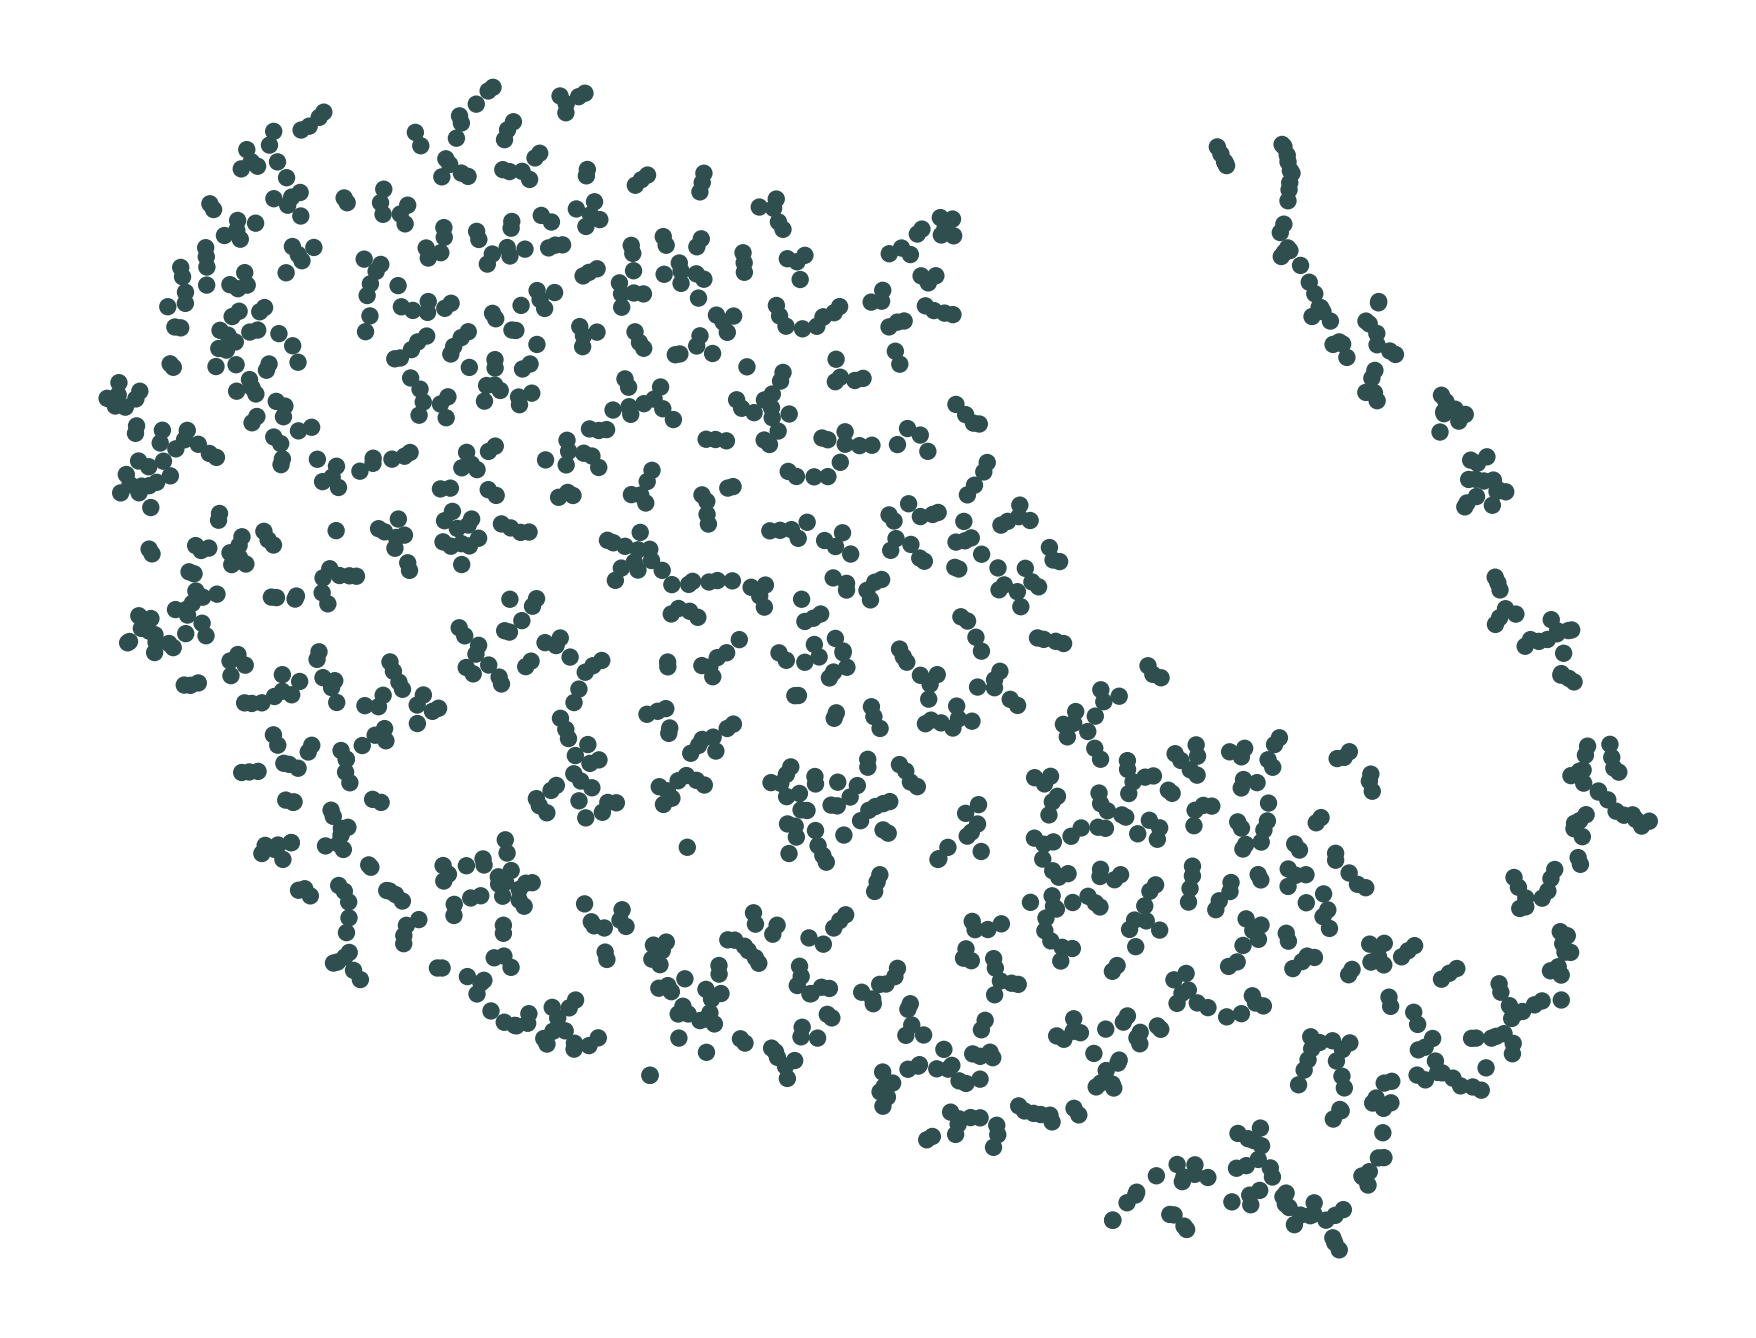

In [5]:
ax = swift.plot_tsne(scikit_embedding)

# Change Marker Size

We can change the marker size by using the `marker_size` parameter. This parameter can be a single value or an array of values. If it is a single value, all the markers will have the same size. If it is an array, the size of each marker will be based on the value of the array. Let's see an example, passing it the matplotlib axes instance:

<Axes: >

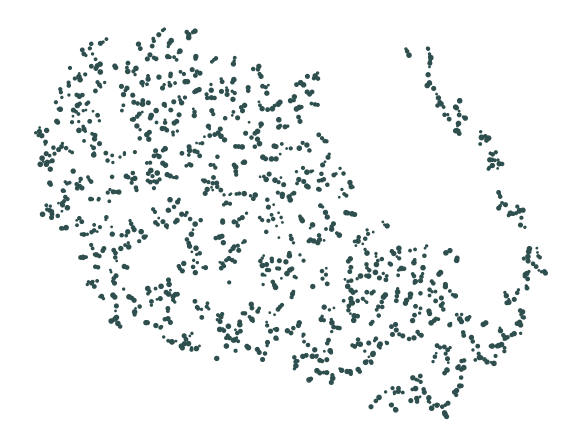

In [6]:
fig, ax2_1 = plt.subplots()
swift.plot_tsne(scikit_embedding, marker_size=np.random.randint(0, 10, size=len(scikit_embedding)), ax=ax2_1)

# Change Marker Color based on non_special_marker_color

We can change the marker color by using the `non_special_marker_color` parameter. This parameter can be a single value or an array of values. If it is a single value, all the markers will have the same color. If it is an array, the color of each marker will be based on the value of the array. Let's see an example, using the same color for all the markers:

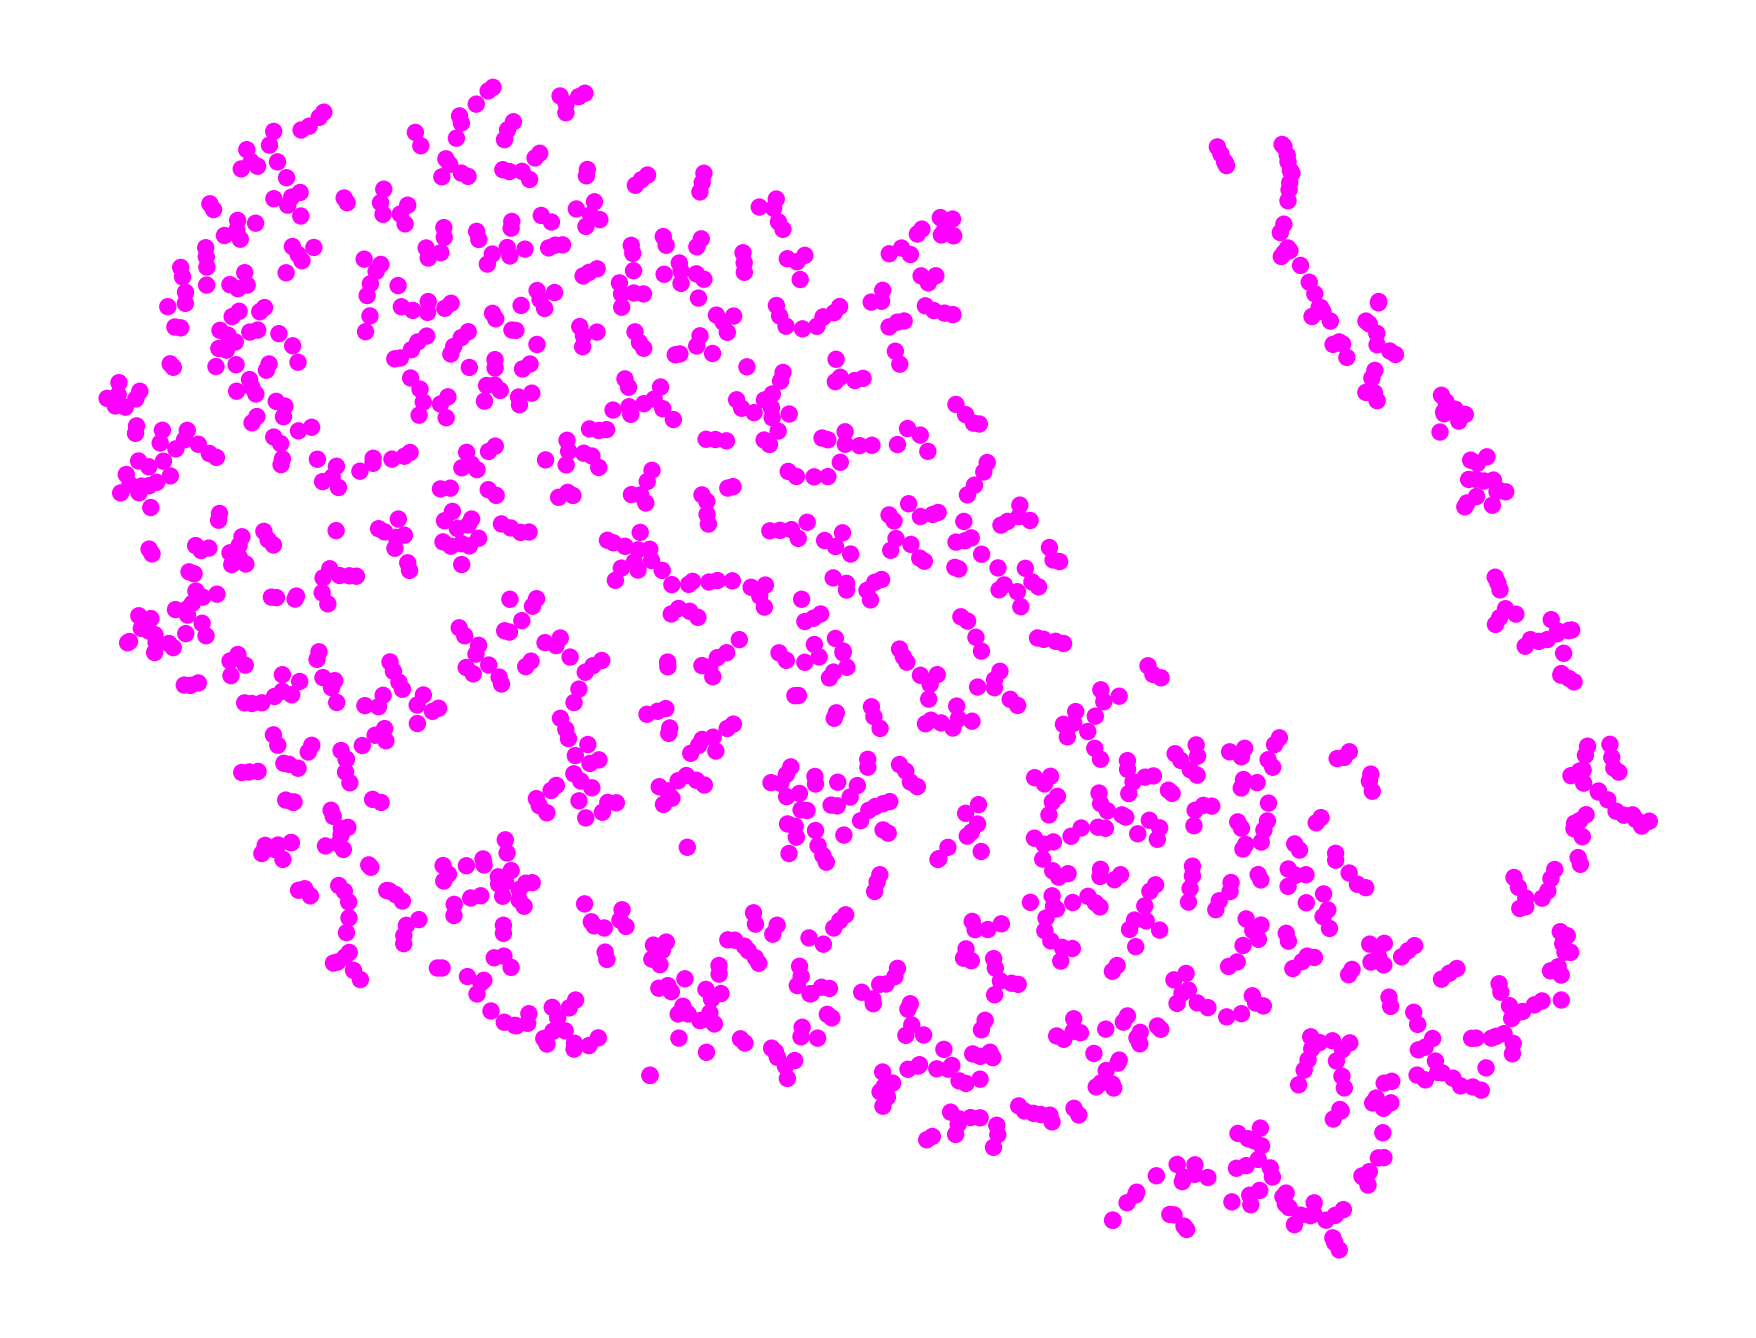

In [7]:
ax3 = swift.plot_tsne(scikit_embedding, non_special_marker_color='magenta')

Now, setting an array of colors:

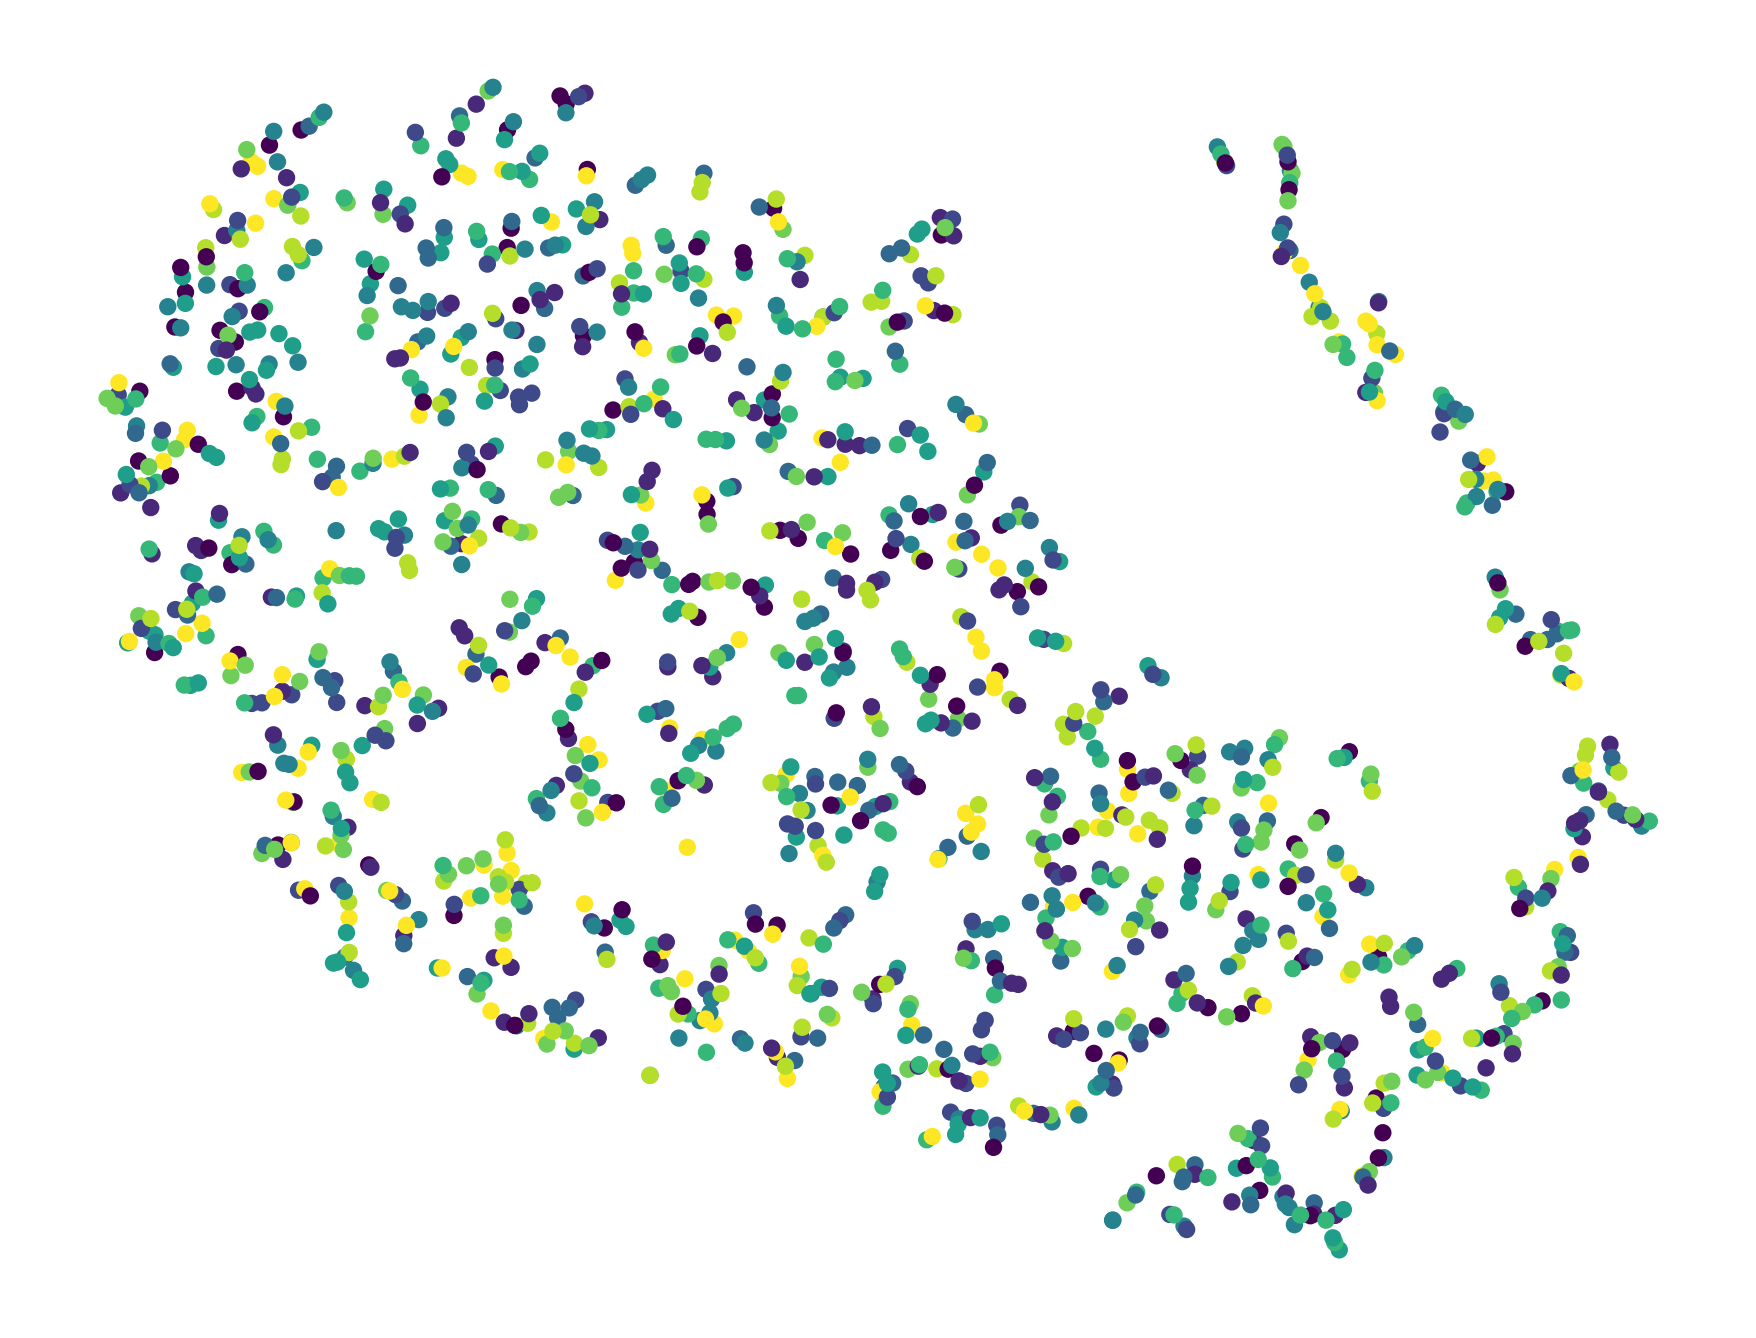

In [8]:
colors = np.random.randint(0, 10, size=len(scikit_embedding))
ax3_1 = swift.plot_tsne(scikit_embedding, non_special_marker_color=colors)

# Change Marker Color based on durations

Additional to the `non_special_marker_color` parameter, we can use the `durations` parameter. By using this parameter, the colormap is based on `jet` colormap and the values of the array of $T_{90}$. Let's see an example:

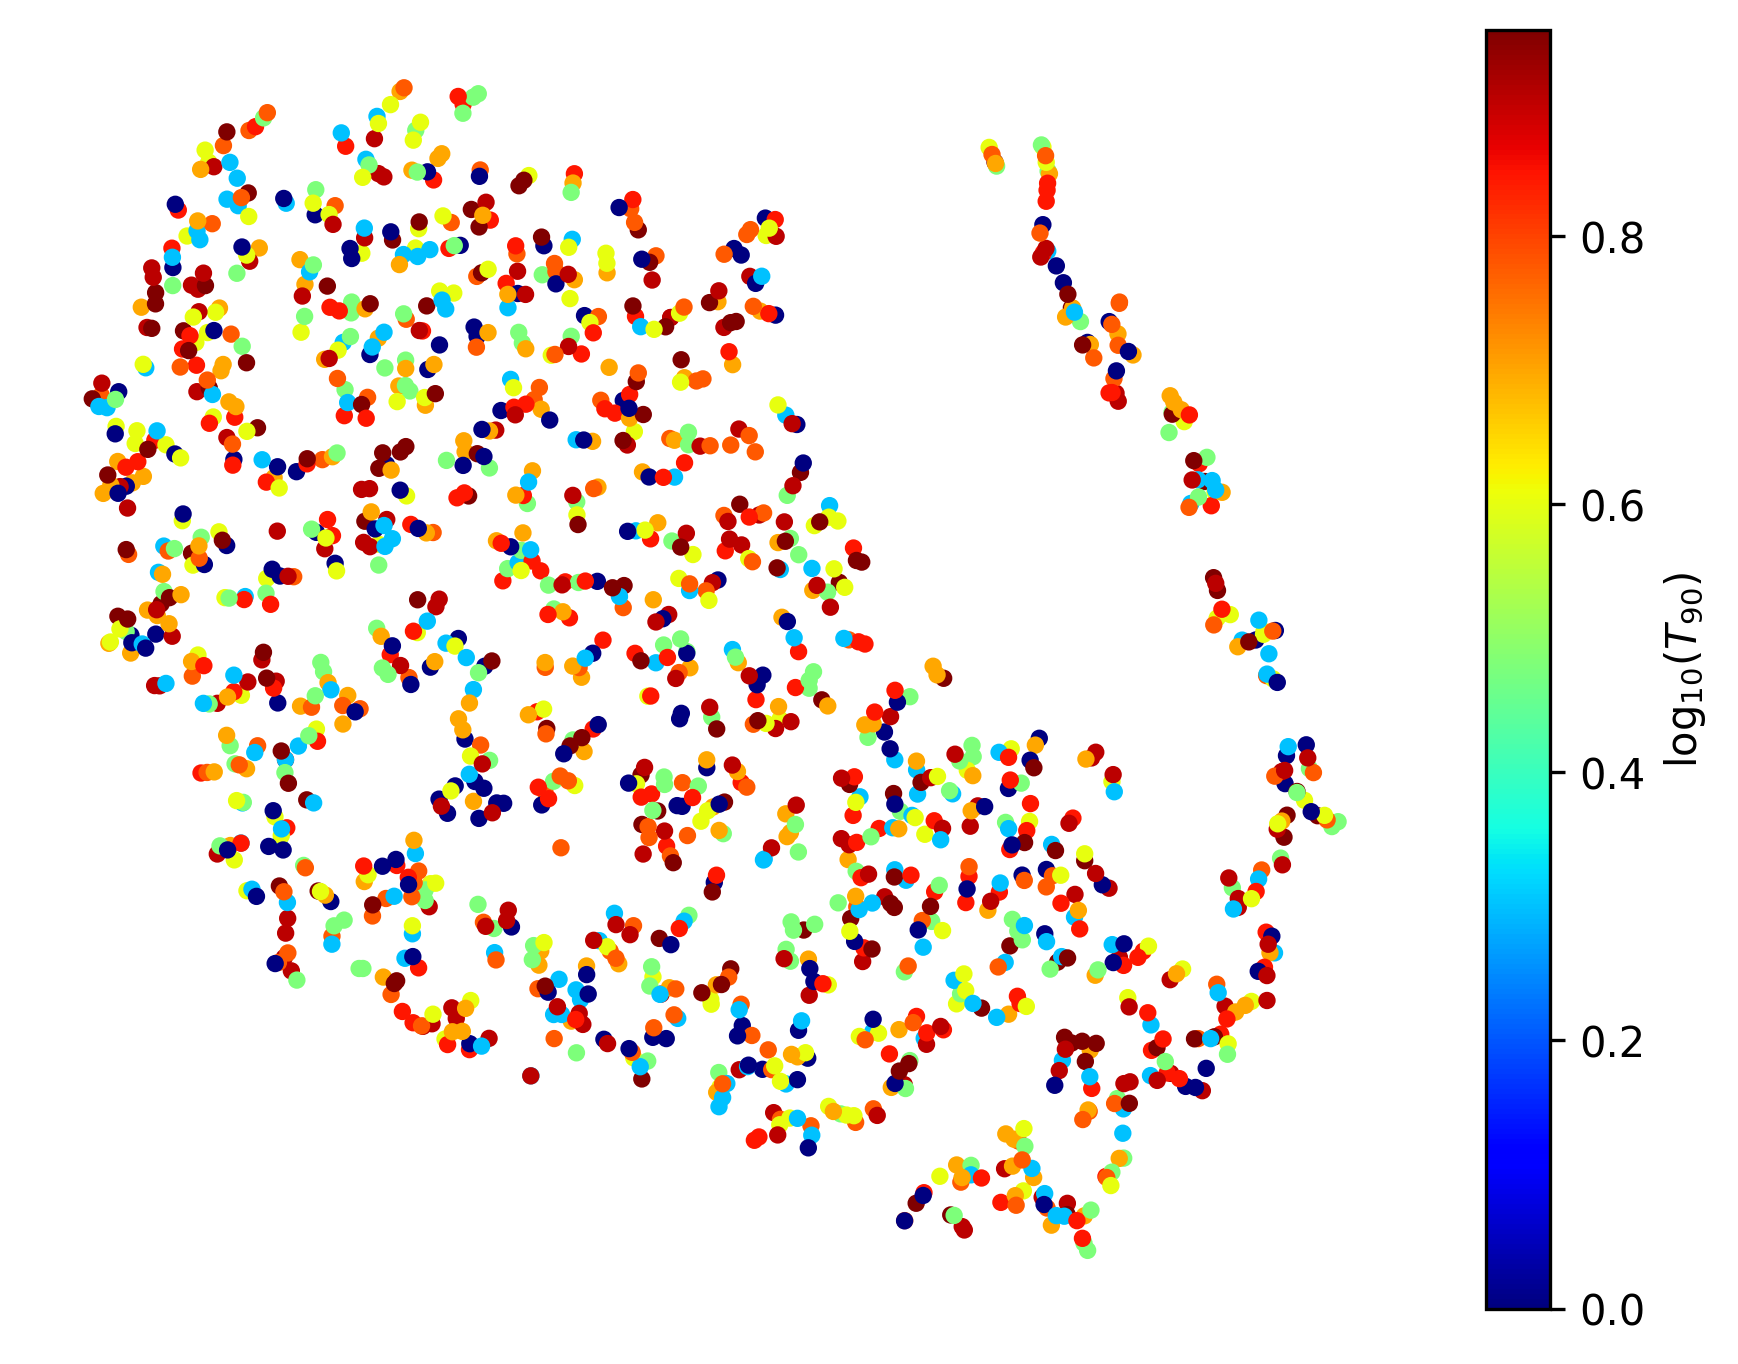

In [9]:
durations = np.random.randint(1, 10, size=len(scikit_embedding))
ax4_1 = swift.plot_tsne(scikit_embedding, durations=durations)

Moreover, it is possible to pass a dictionary of [color bar arguments](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) in  into the `color_bar_kwargs` parameter. We can also pass the durations $T_{90}$ directly from Swift/BAT data:

Finding Durations: 100%|██████████| 1453/1453 [00:00<00:00, 1700.68GRB/s]


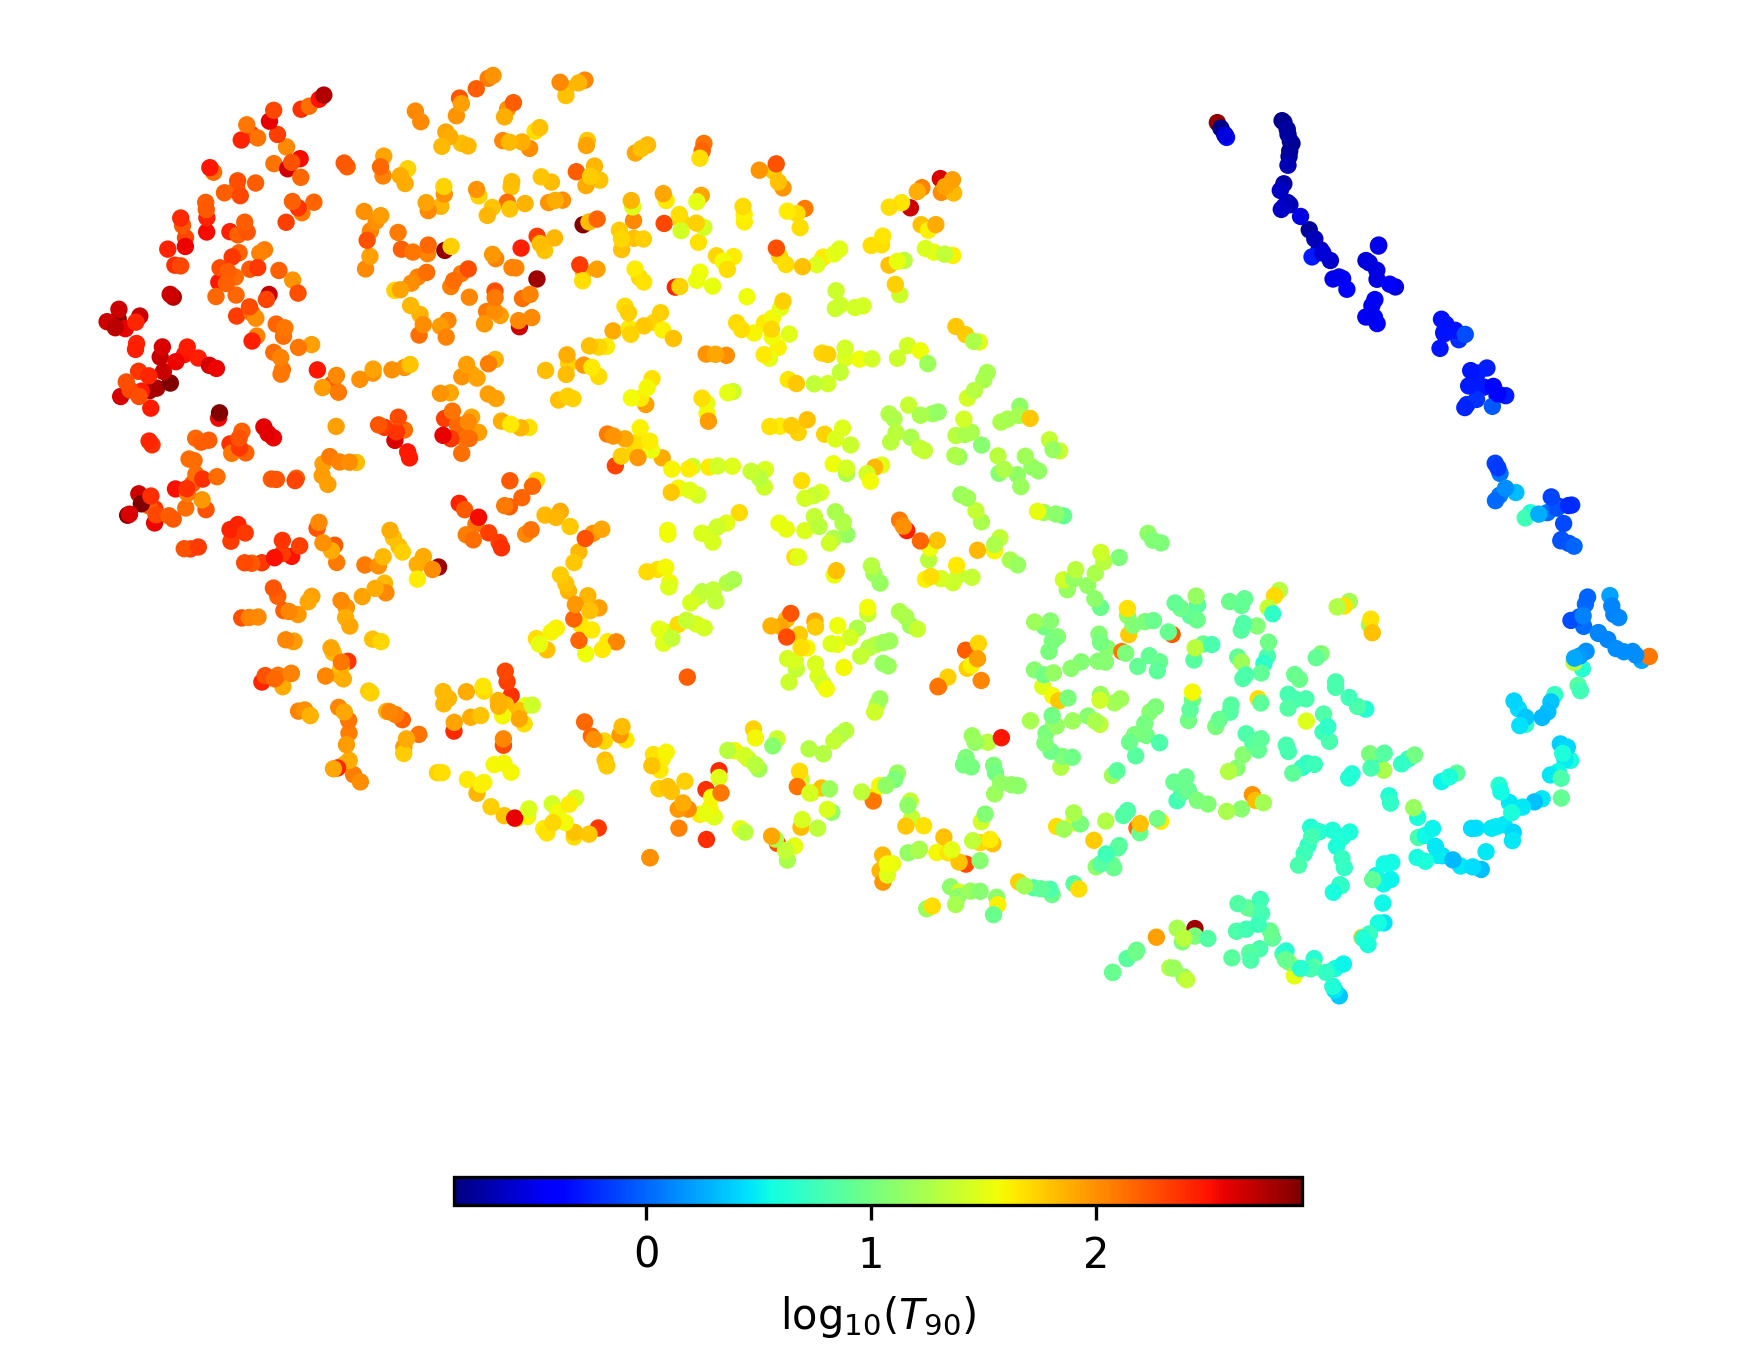

In [10]:
durations = swift.total_durations(grb_names, t=90)
ax4_2 = swift.plot_tsne(scikit_embedding, durations=durations, color_bar_kwargs={'orientation':'horizontal', 'shrink':0.5, 'pad':0.1, 'aspect':30})

# Change Marker Size based on redshifts

It is possible to set the redshifts and scale the marker size based on them. Using the `redshifts` instance of **ClassiPyGRB**, you can obtain an array of size 2 with the name and redshift for the GRB. Using this output, it is possible to pass the redshifts to the `redshifts` parameter of `plot_tsne`. By doing this, the instance re-size the markers based on the redshifts.

Let's see an example:

Finding Redshifts: 100%|██████████| 1453/1453 [00:00<00:00, 1596.87GRB/s]


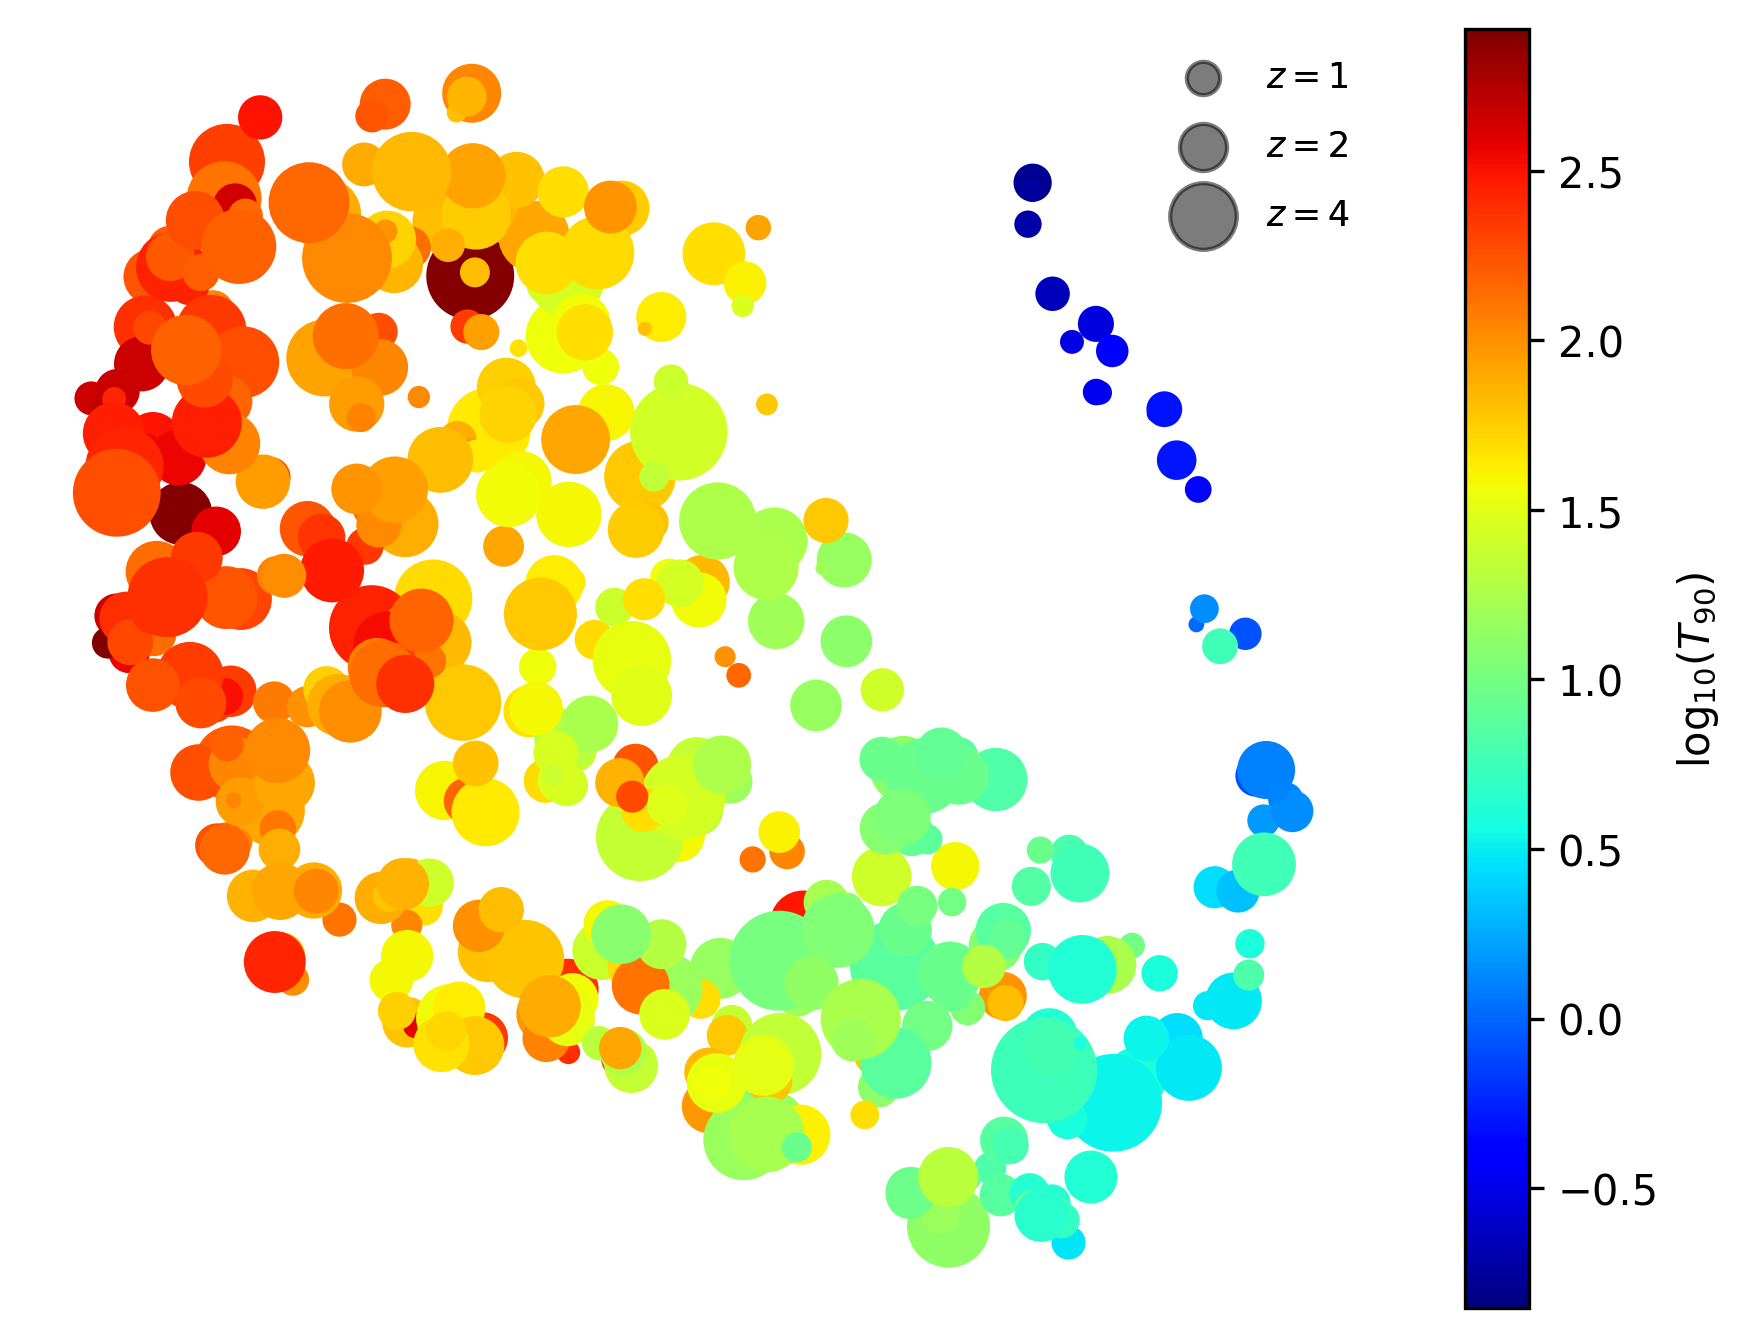

In [11]:
redshifts=swift.redshifts(grb_names)
ax5_1 = swift.plot_tsne(scikit_embedding, durations=durations, redshifts=redshifts)

Removing the legend is possible by setting the `legend_redshifts` flag to `False`. Moreover, the redshifts argument overrides the `marker_size` parameter, if both are set:

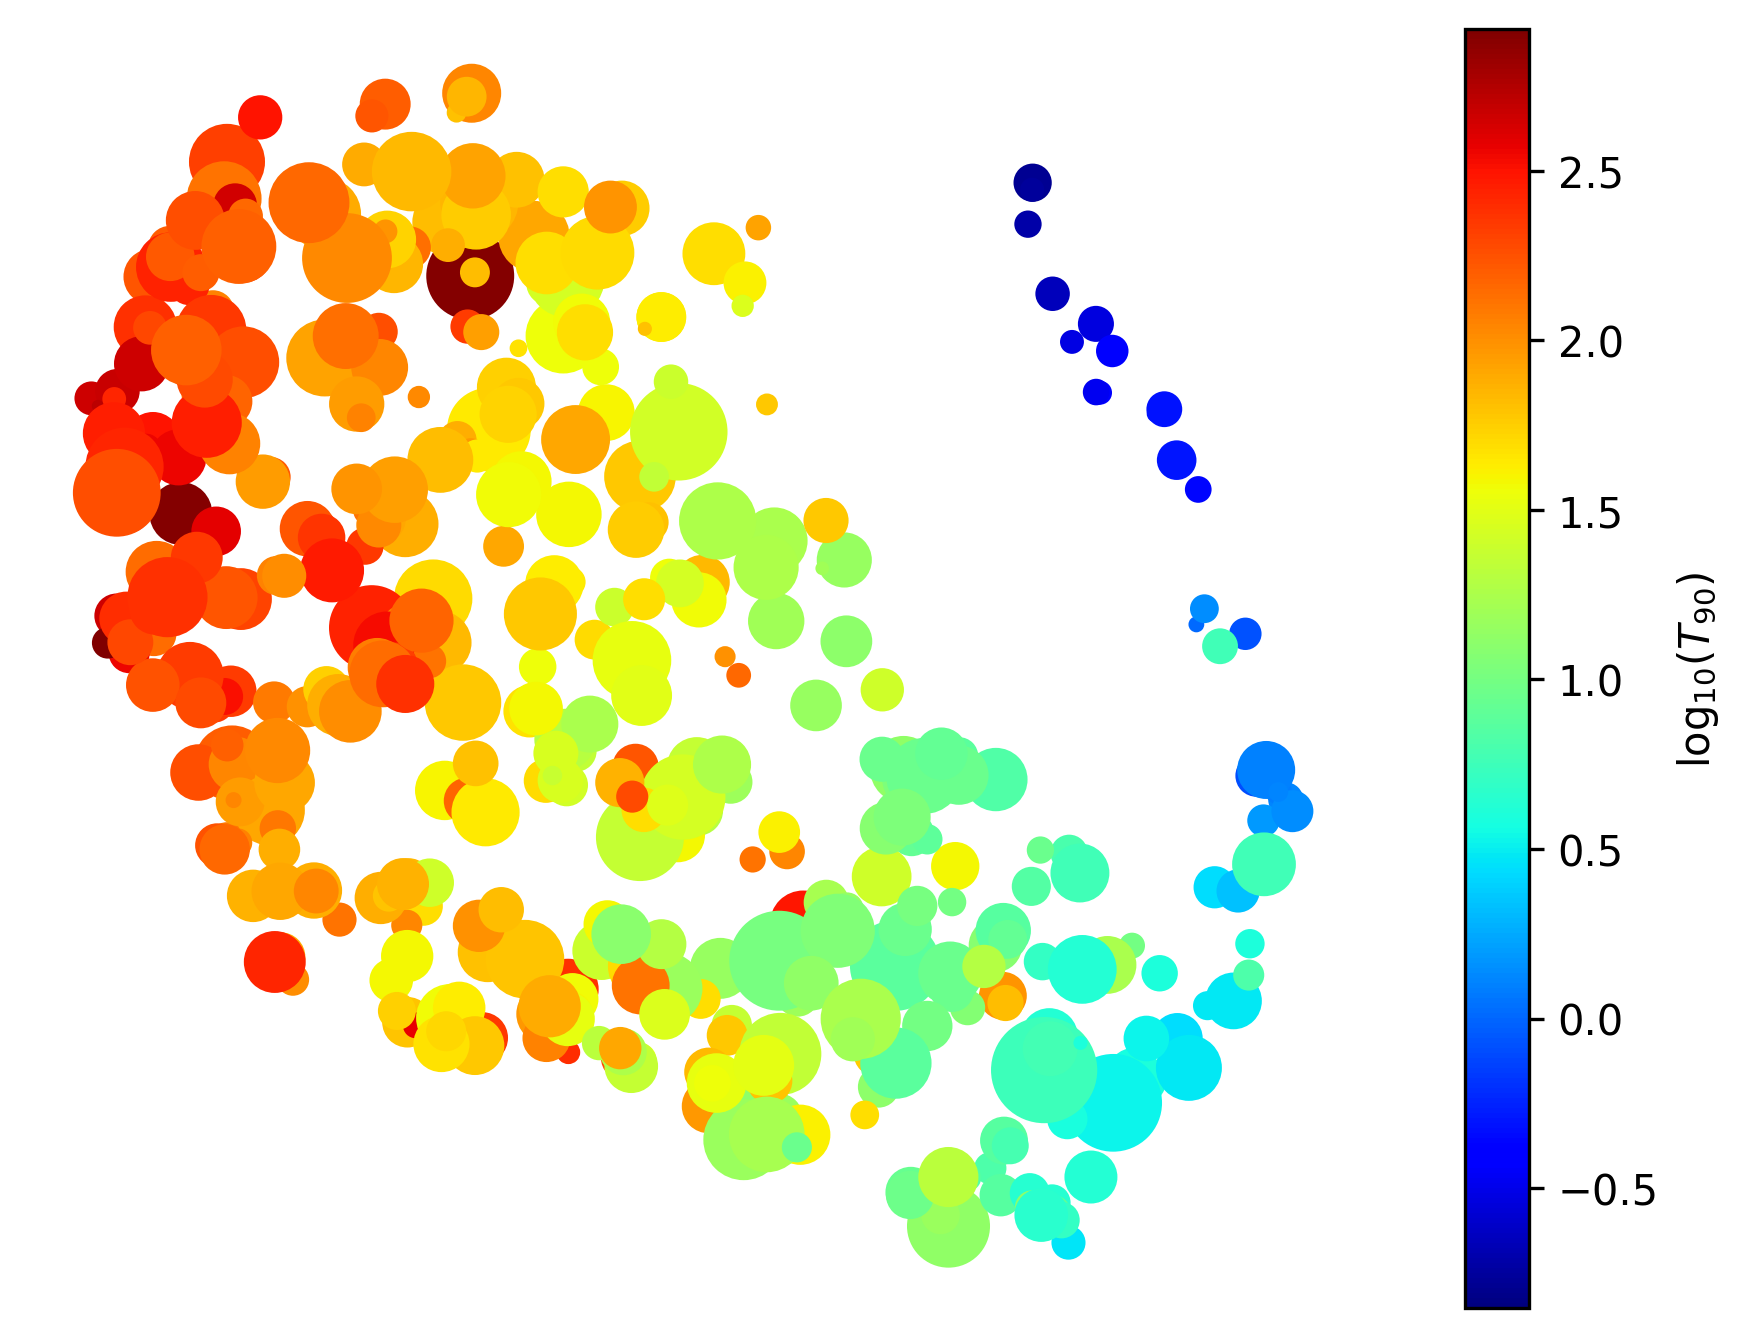

In [12]:
ax5_2 = swift.plot_tsne(scikit_embedding, durations=durations, redshifts=redshifts, marker_size=np.random.randint(0, 10, size=len(scikit_embedding)), legend_redshifts=False)  # Try to set dual marker size

By setting a true flag of legend redshifts. It is possible to pass a dictionary of [legend arguments](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) into the `redshift_kwargs` parameter to customize the legend returned:

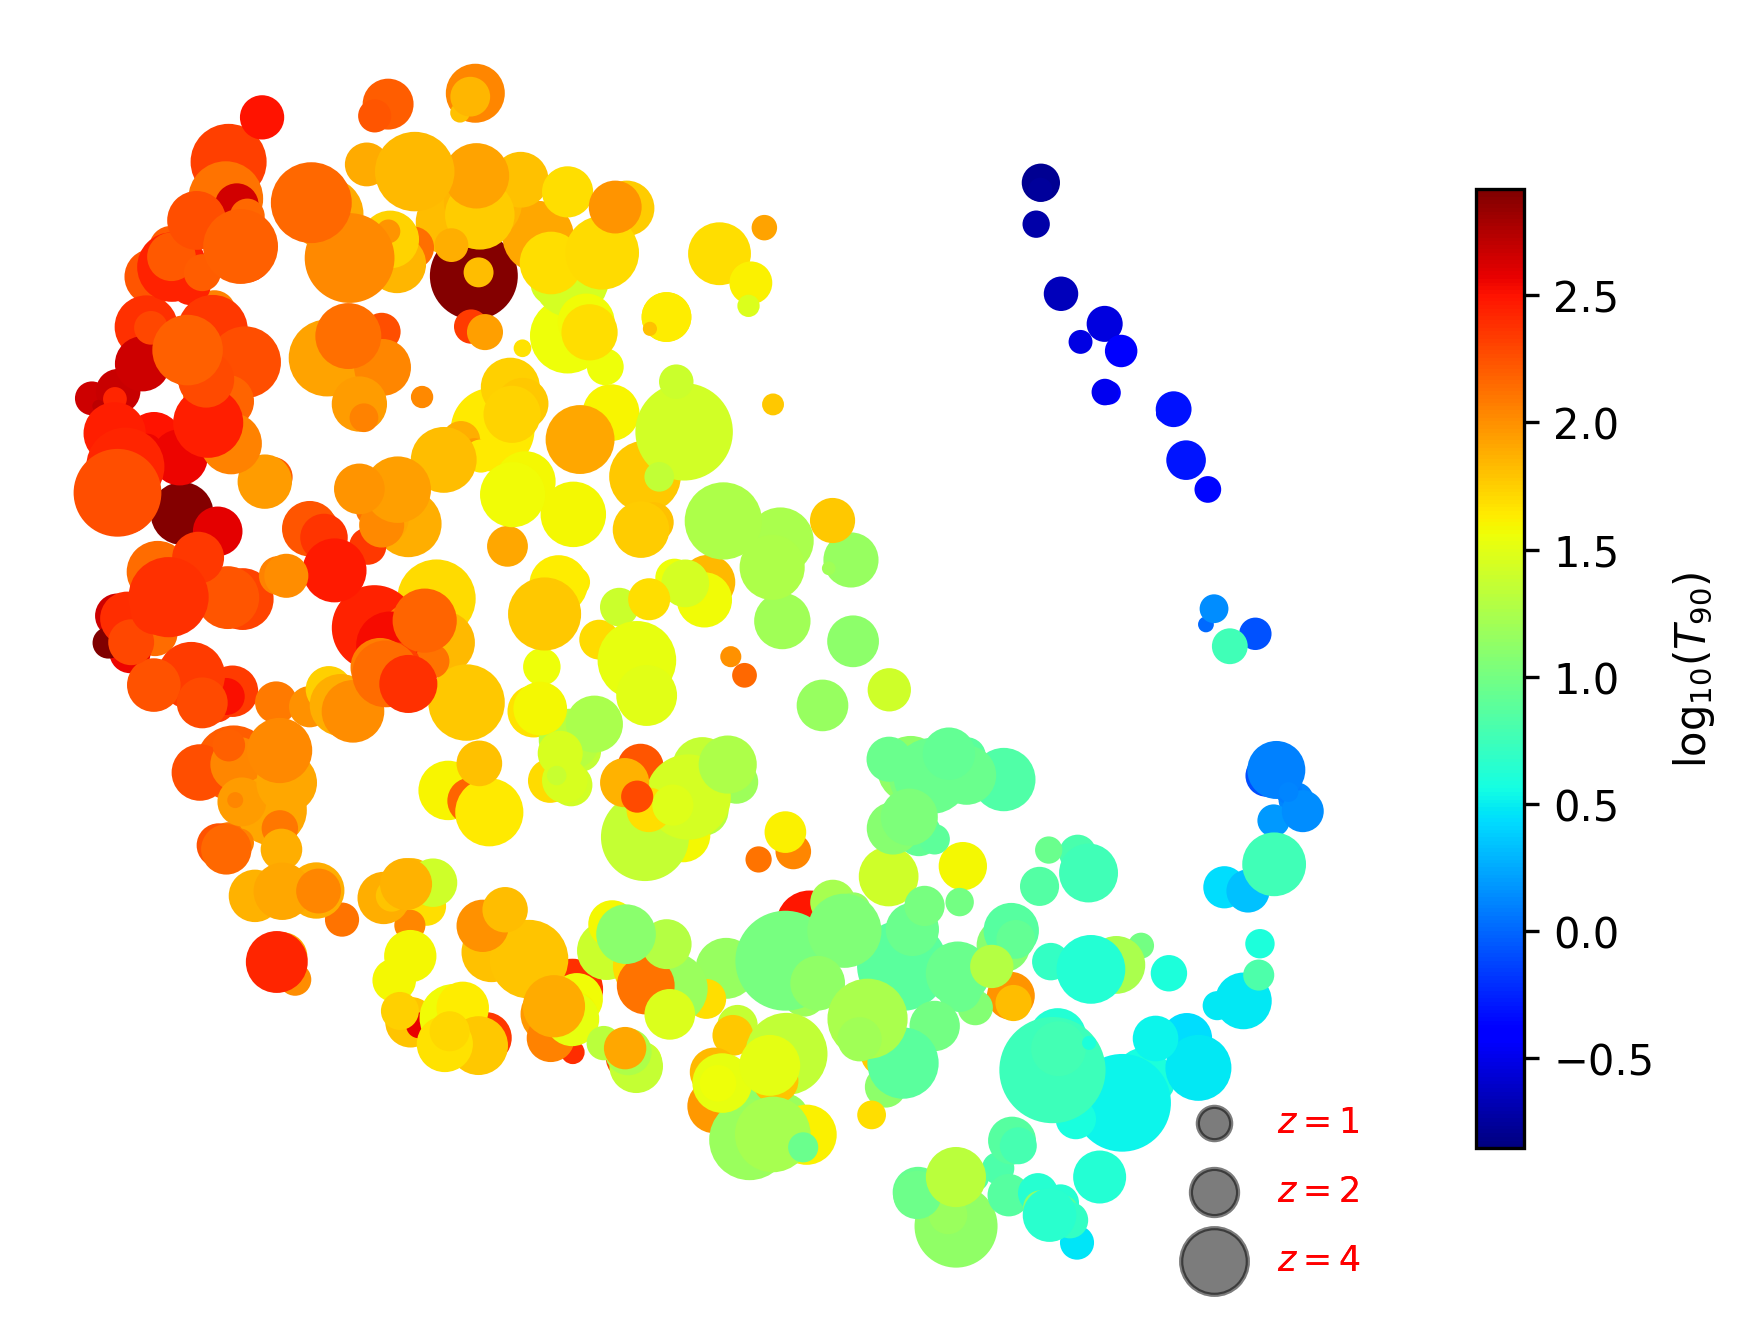

In [13]:
ax6 = swift.plot_tsne(scikit_embedding, durations=durations, redshifts=redshifts, redshift_kwargs={'loc':'best', 'bbox_to_anchor':(0.5, 0., 0.5, 0.5), 'labelcolor':'r'}, color_bar_kwargs={'shrink':0.75})

# Change color limits of the colorbar

By default, the color limits of the colorbar are set to the minimum and maximum values of the durations. However, it is possible to change these limits by using the `color_limits` parameter:

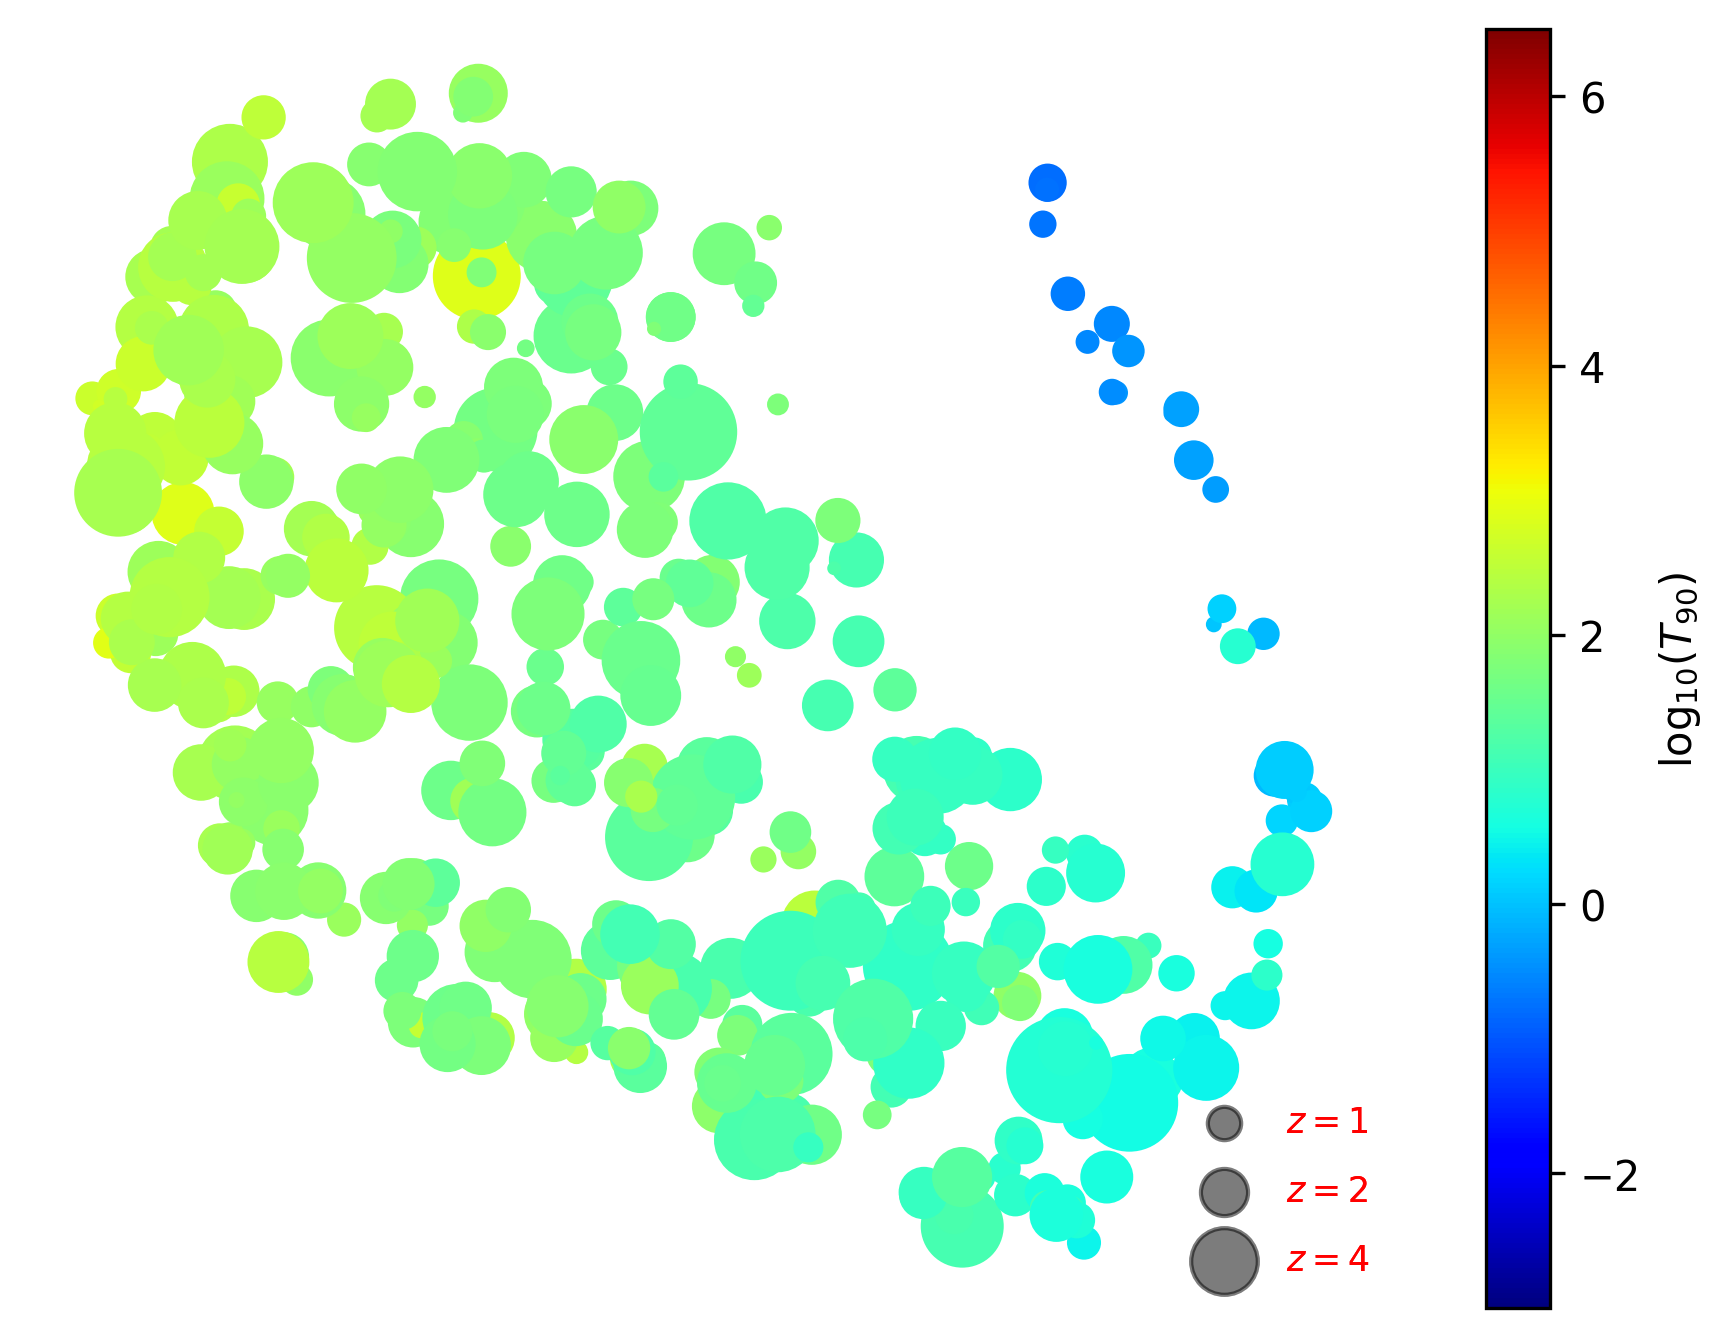

In [14]:
ax7 = swift.plot_tsne(scikit_embedding, durations=durations, redshifts=redshifts, redshift_kwargs={'loc':'best', 'bbox_to_anchor':(0.5, 0., 0.5, 0.5), 'labelcolor':'r'}, color_limits=[-3, 6.5])

# Return colorbar

It is possible to return the colorbar by setting the `return_colorbar` flag to `True`. This is useful if you want to remove the colorbar from the plot:

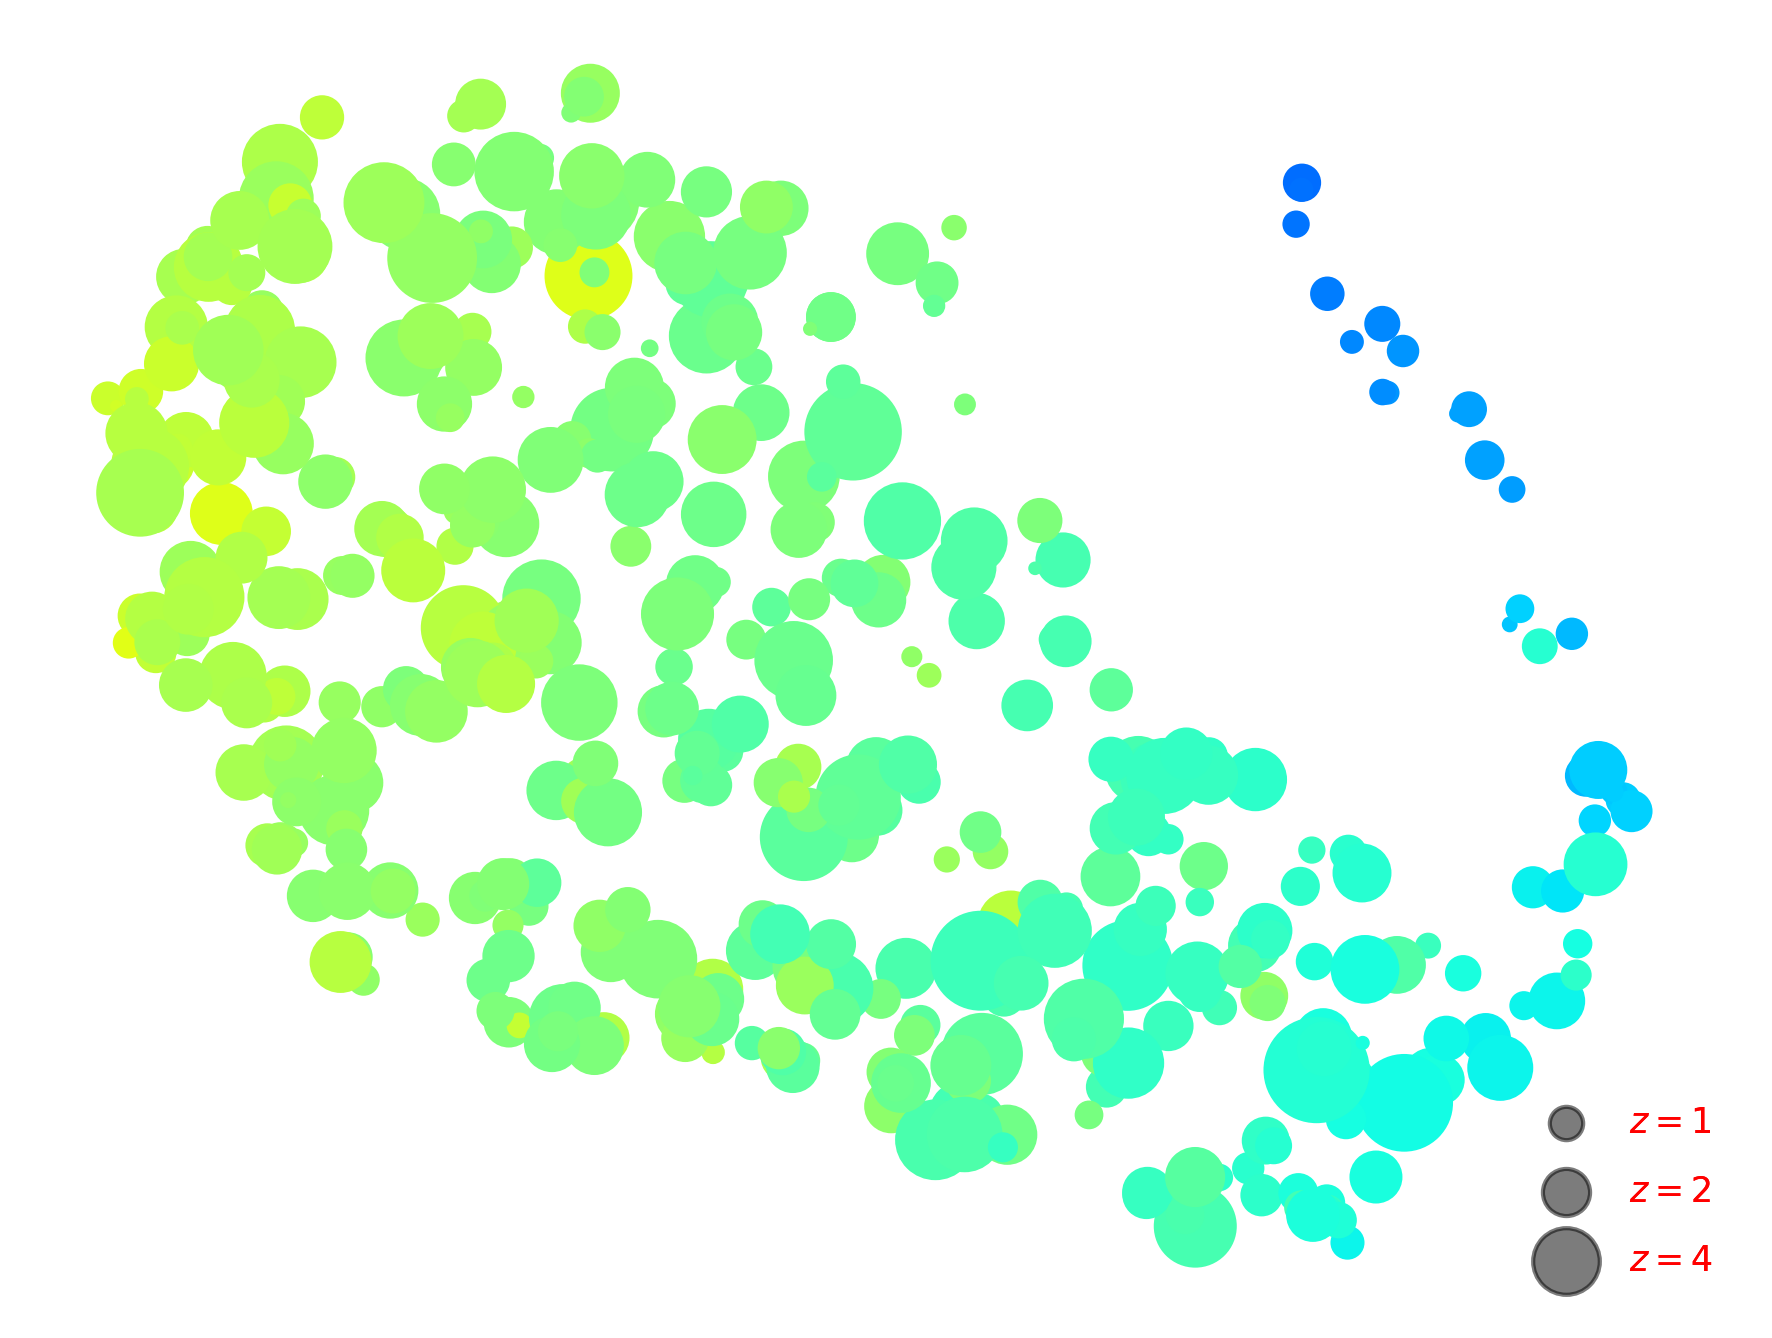

In [15]:
ax8, bar = swift.plot_tsne(scikit_embedding,
                      durations=durations,
                      redshifts=redshifts,
                      redshift_kwargs={'loc':'best', 'bbox_to_anchor':(0.5, 0., 0.5, 0.5), 'labelcolor':'r'},
                      color_limits=[-3, 6.5],
                      return_colorbar=True)
bar.remove()  # Remove color bar

# Add special GRBs

Another useful feature is the possibility to add special GRBs to the plot. By adding special GRBs, the markers will be highlighted by a different shape and/or color.

This is possible by using the `special_cases` parameter. This parameter can be a list of GRB names or a single GRB name. Let's see an example:

[[ -1.2939185 -12.135696 ]
 [-31.995901  -11.050974 ]]


(-62.40095729827881, 74.18474407196045, -34.60663442611694, 29.192817974090577)

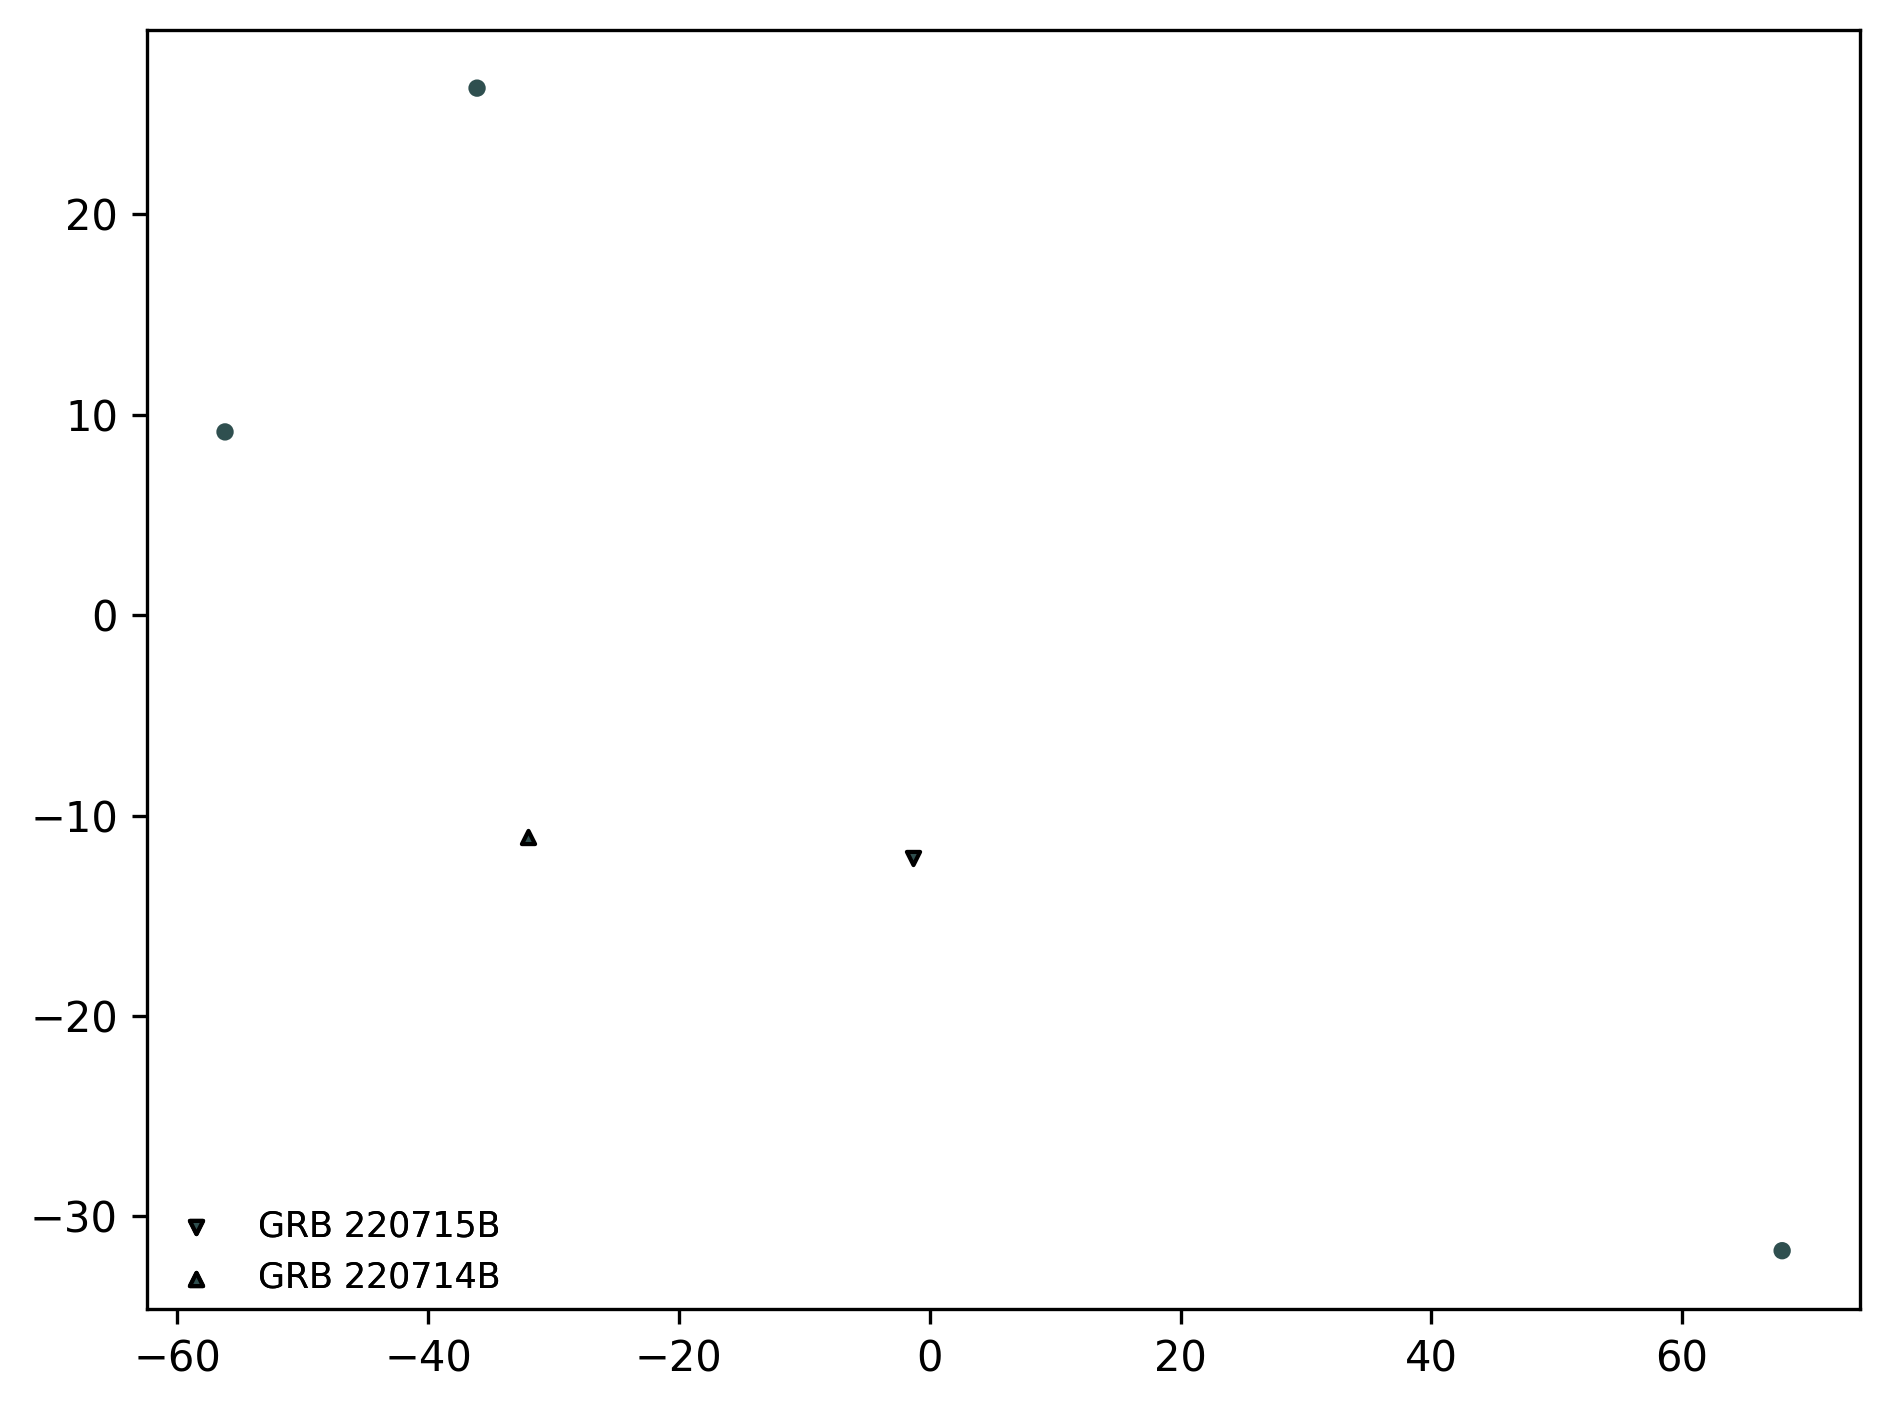

In [16]:
ax9 = swift.plot_tsne(scikit_embedding[:5], names=grb_names[:5], special_cases=grb_names[:2])
print(scikit_embedding[:2])
plt.axis('on')

As you can see, the first two GRBs are highlighted by a different shape and color, based on this position after performing TSNE. Moreover, the legend is automatically added to the plot.

Now let's see an example with a list of Extended Emission GRBs from Lien et al. (2016):

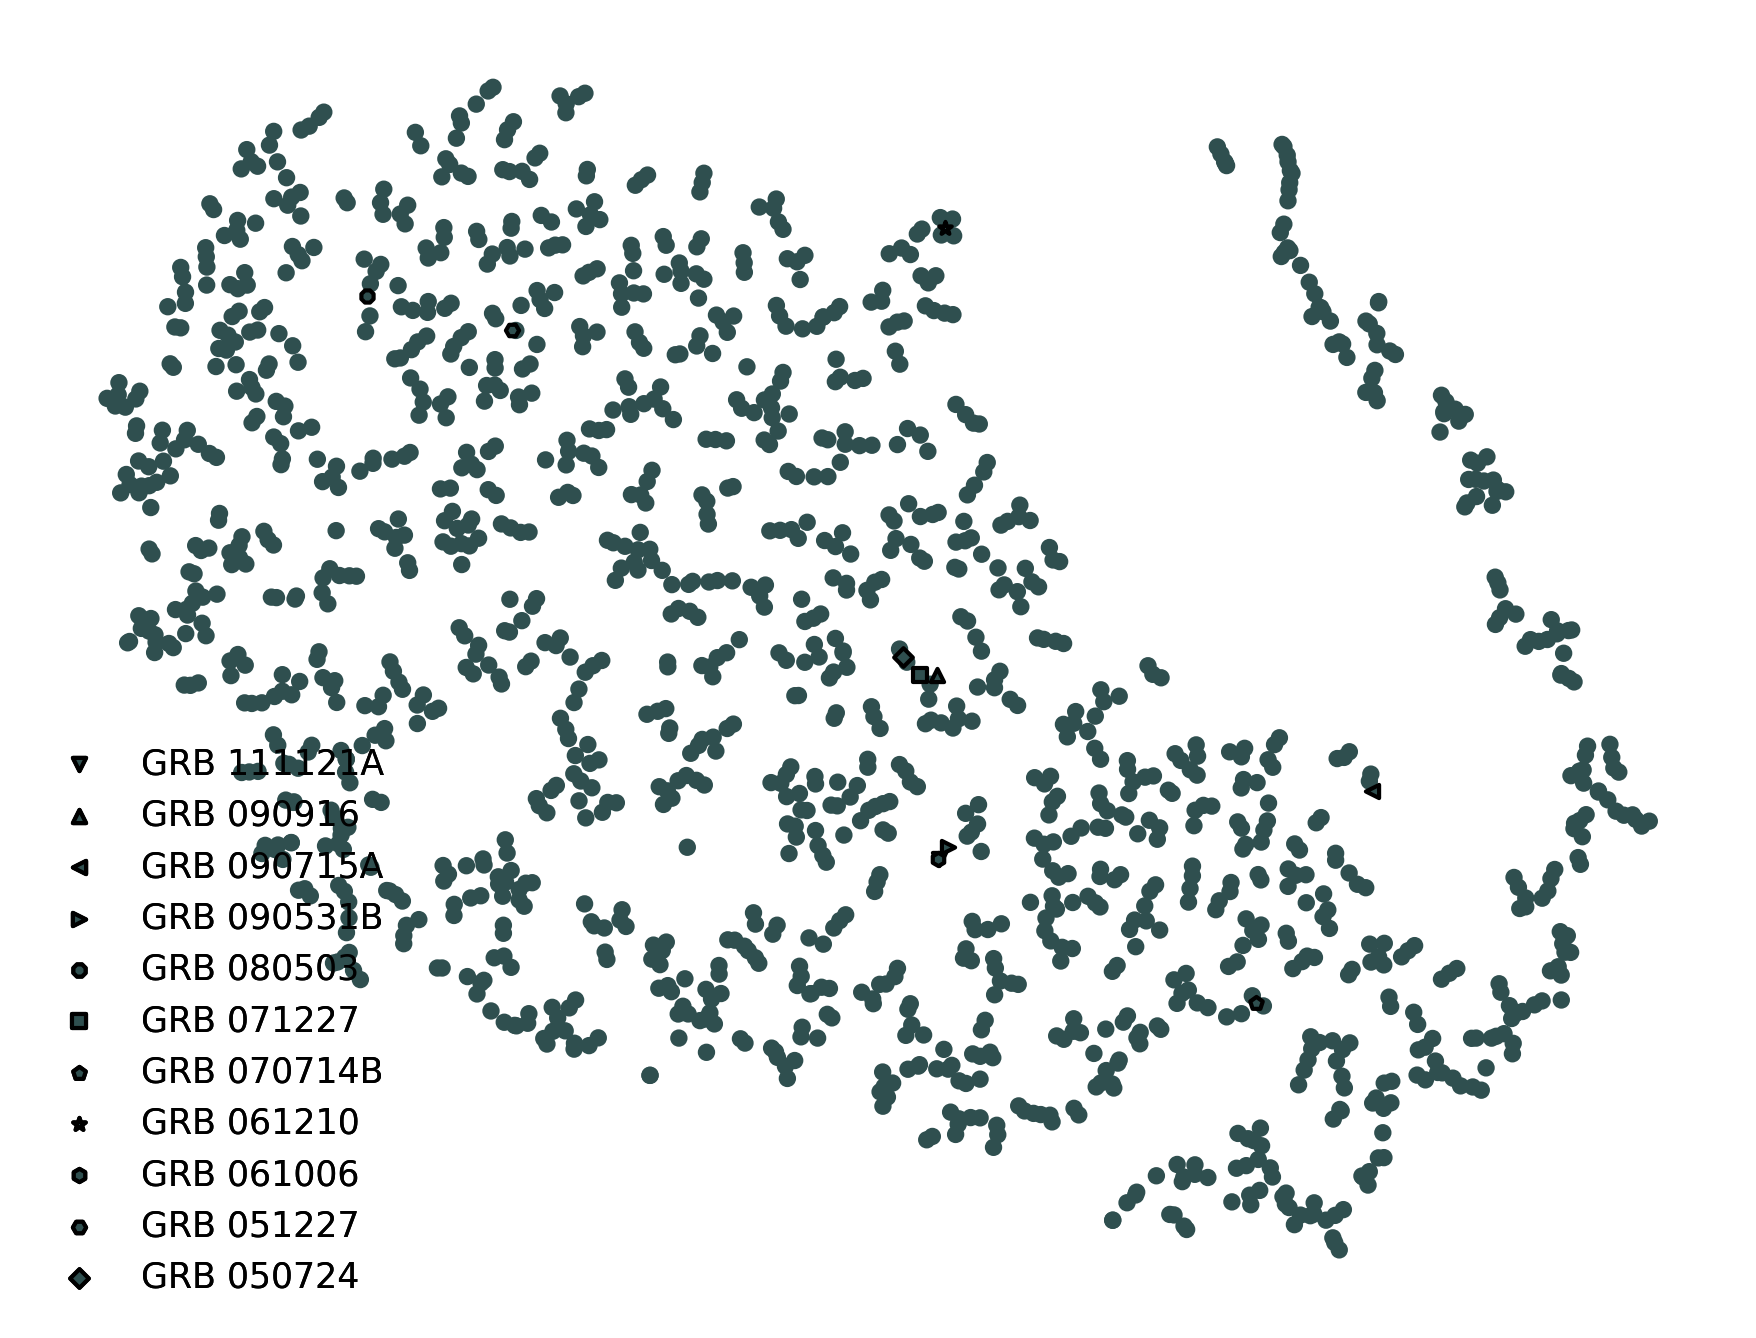

In [17]:
EE_Lien16 = ['GRB150424A', 'GRB111121A', 'GRB090916', 'GRB090715A', 'GRB090531B', 'GRB080503', 'GRB071227', 'GRB070714B', 'GRB061210', 'GRB061006', 'GRB051227', 'GRB050724'] # Review of Swift/BAT data, Table 3 of https://ui.adsabs.harvard.edu/abs/2016ApJ...829....7L/abstract
ax10 = swift.plot_tsne(scikit_embedding, names=grb_names, special_cases=EE_Lien16)

To see a further review in Extended Emission GRBs in TSNE and its behavior, check the work of [Garcia-Cifuentes et al.(2023)](https://ui.adsabs.harvard.edu/abs/2023arXiv230408666G/abstract).

# Change color of special and non-special GRBs

It is possible to change the color of the special and non-special GRBs by using the `special_marker_color` and `non_special_marker_color` parameters. It follows the same procedure as usual colors. Let's change colors in the previous example:

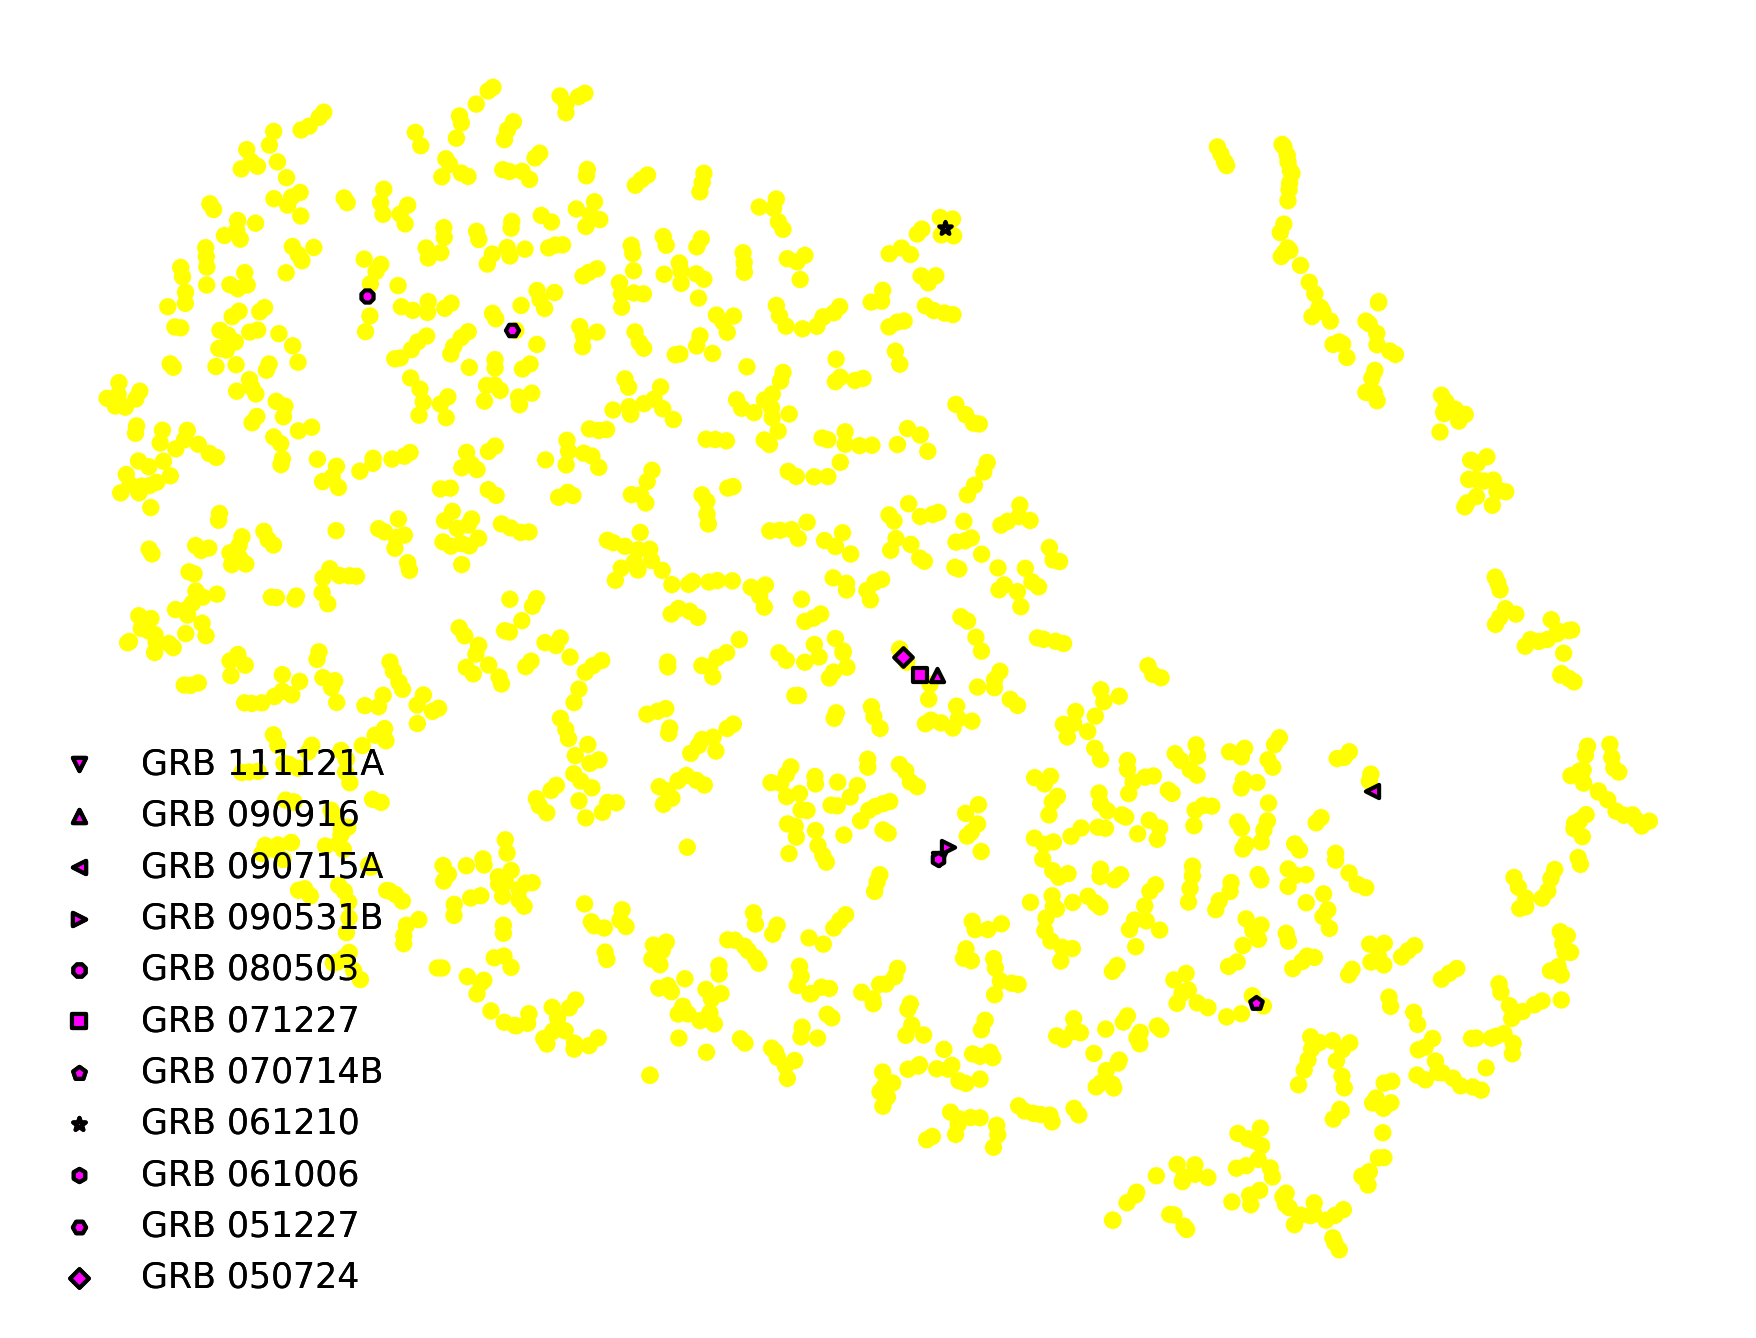

In [18]:
ax11 = swift.plot_tsne(scikit_embedding, names=grb_names, special_cases=EE_Lien16, special_marker_color='magenta', non_special_marker_color='yellow')

# Change marker size of special and non-special GRBs

It is also possible to change the marker size of the special and non-special GRBs by using the `special_marker_size` and `marker_size` parameters.

Let's change the marker size in the previous example:

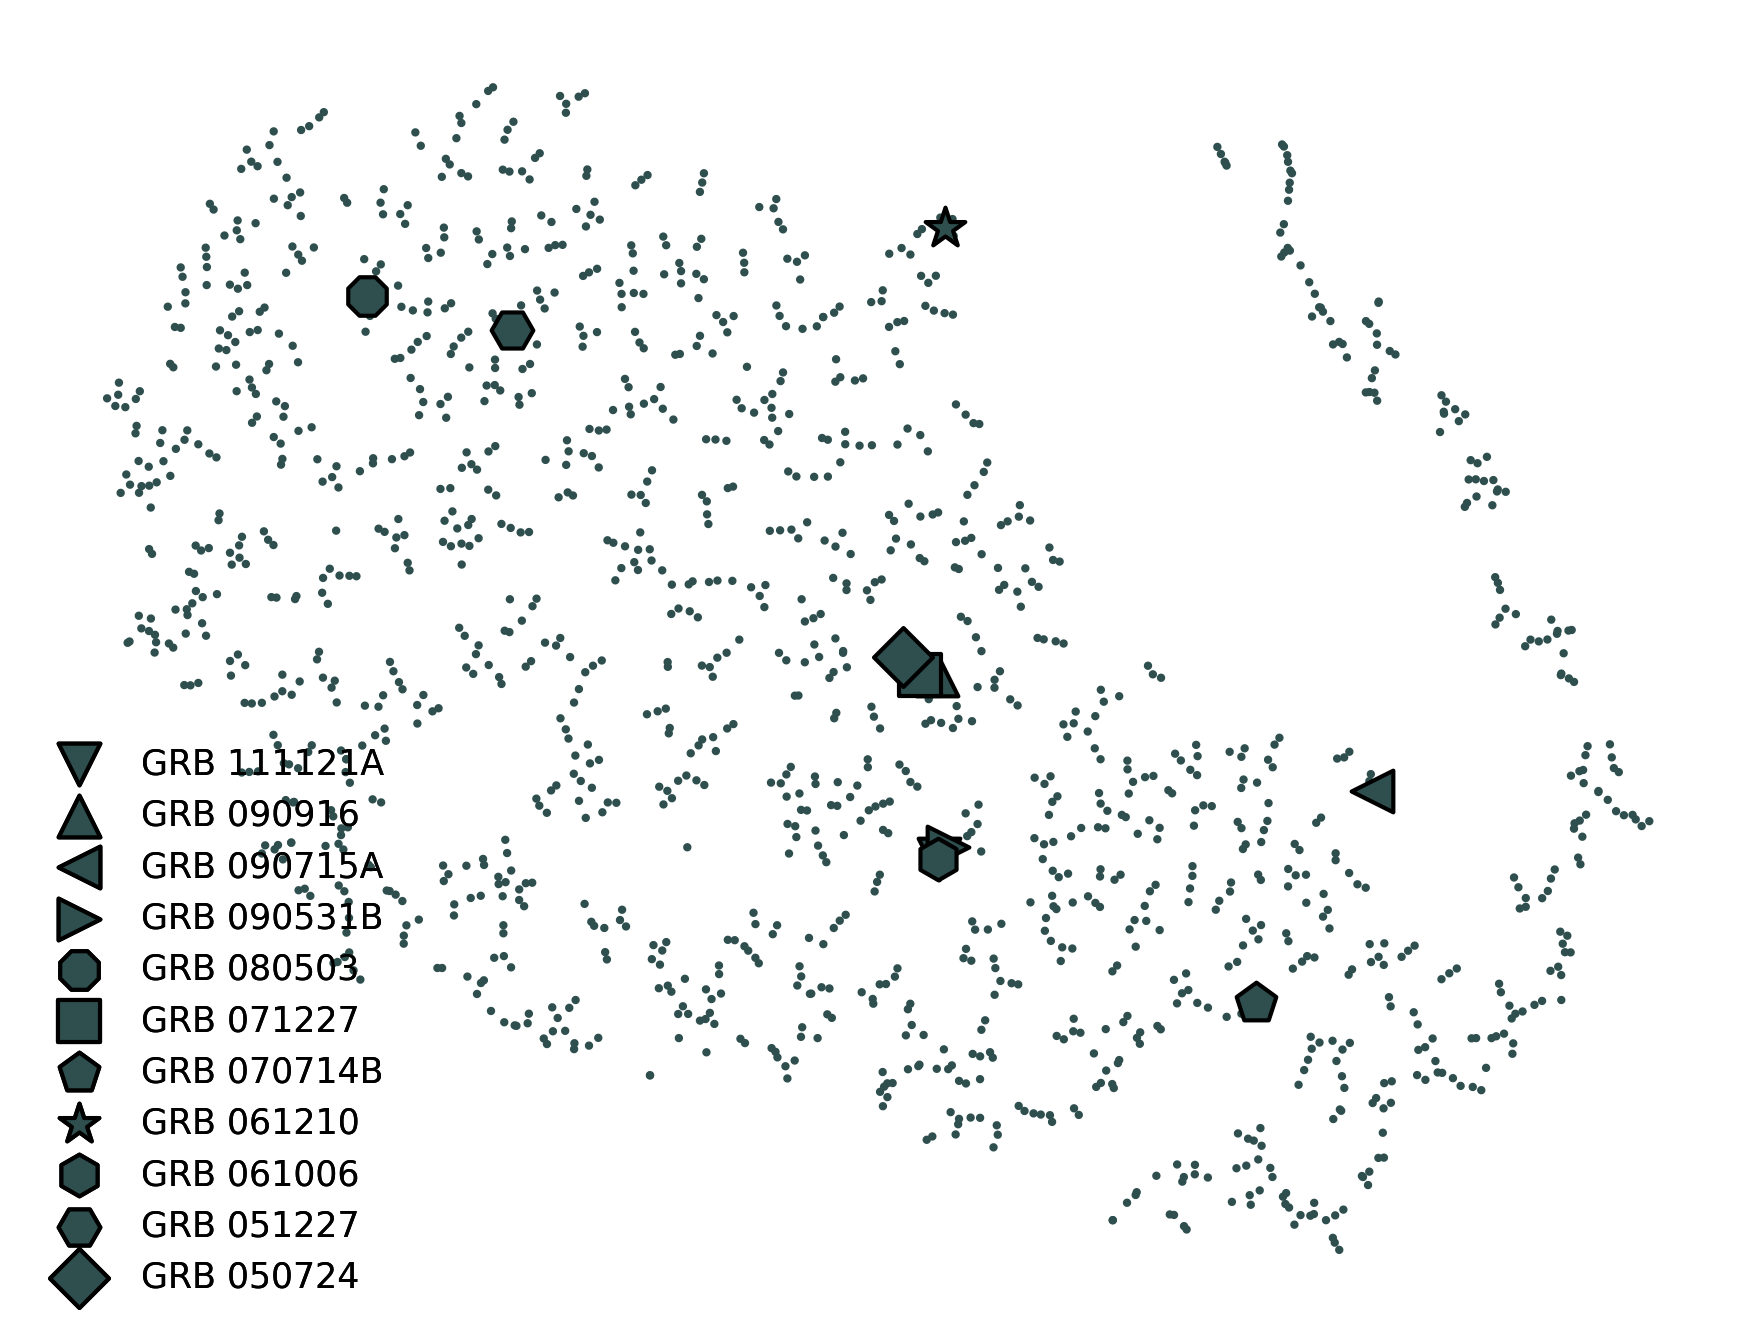

In [19]:
ax12 = swift.plot_tsne(scikit_embedding, names=grb_names, special_cases=EE_Lien16, special_marker_size=100, marker_size=1)

# Further customize special scatter

It is possible to further customize the special scatter by using the `special_kwargs_plot` parameter. This parameter is a dictionary of [scatter arguments](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) that will be passed to the special scatter.

Also, it is possible to hide or show the legend of the special scatter by using the `legend_special_cases` flag. Moreover, you can customize the legend passing a dictionary of [legend arguments](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) to `special_kwargs_legend`. See the examples below:

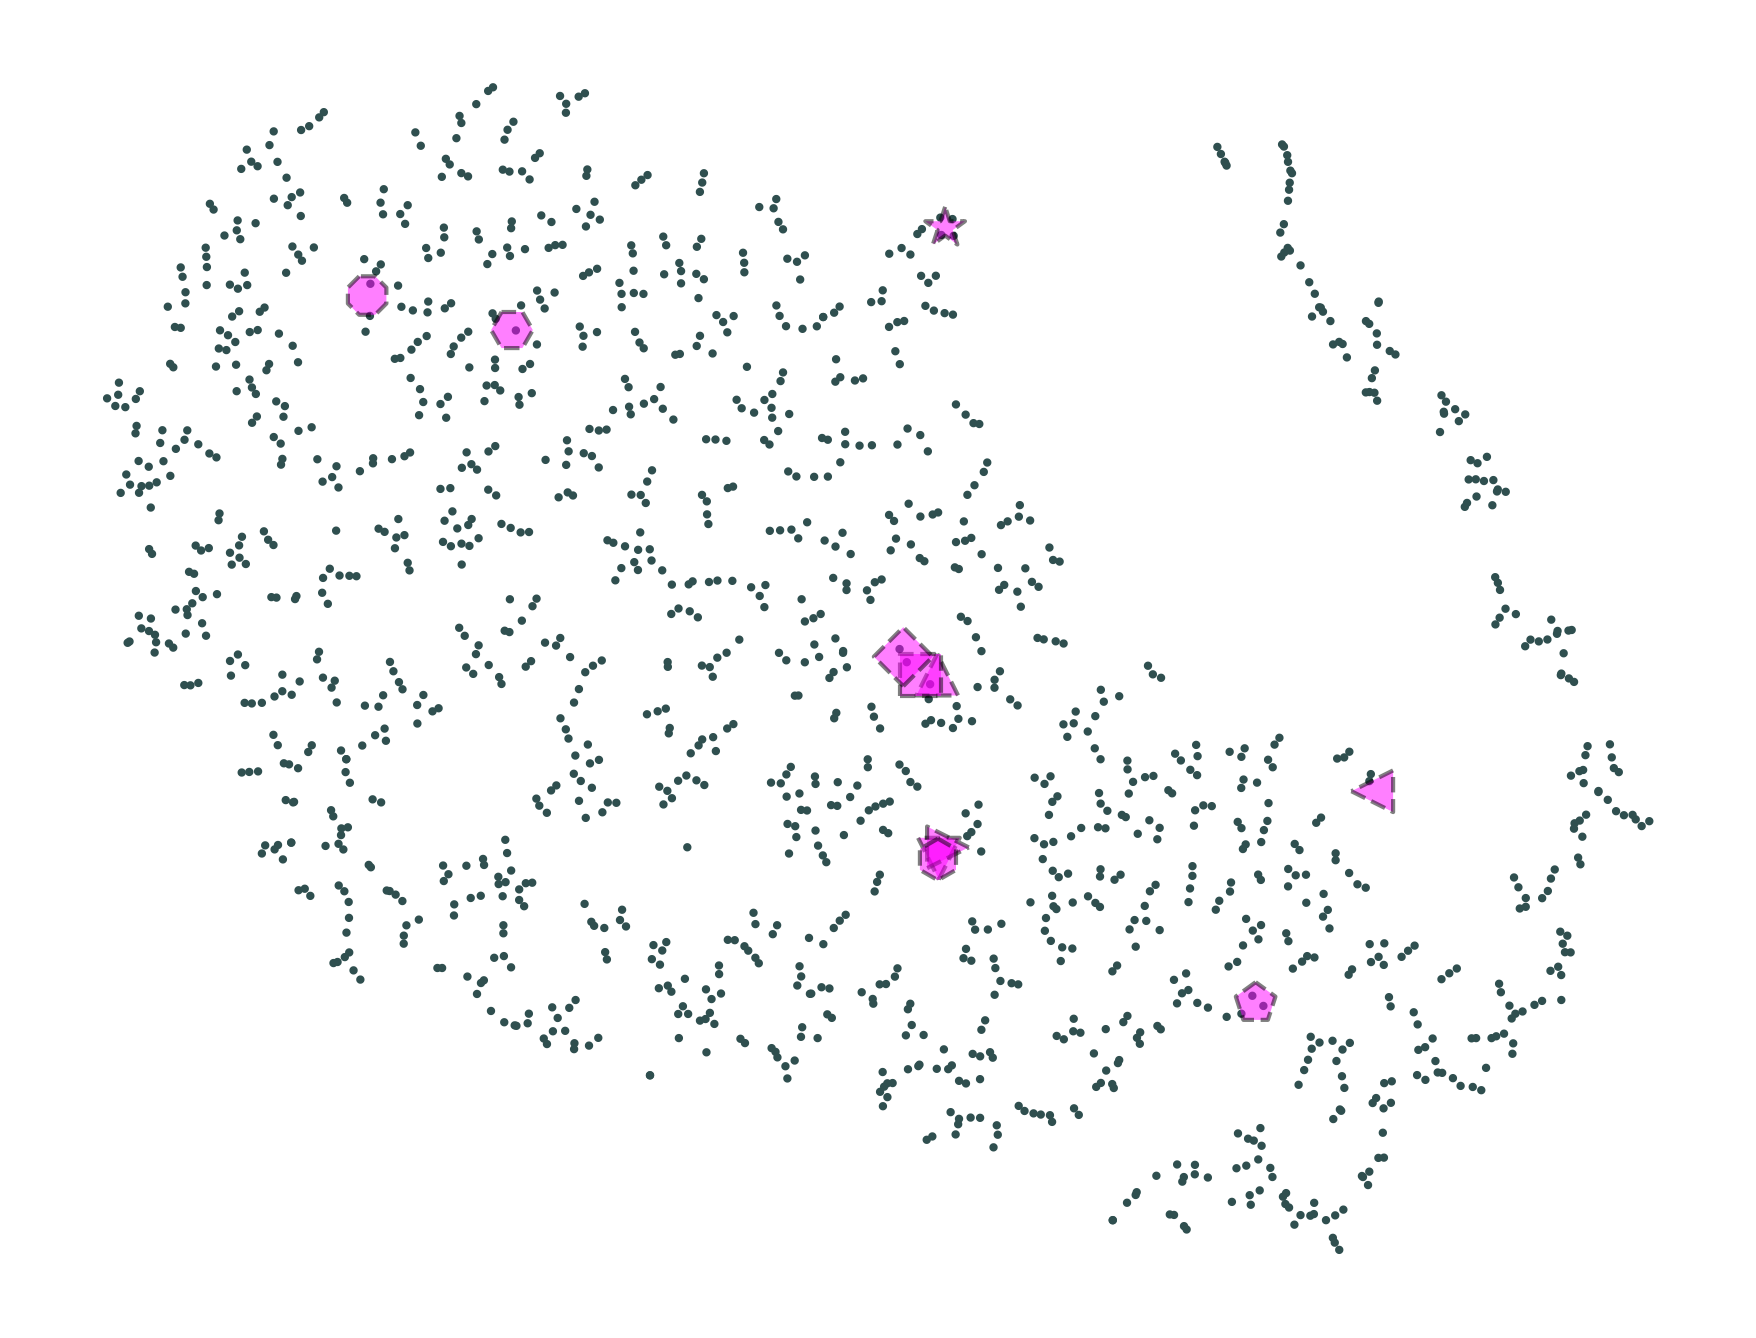

In [24]:
ax13 = swift.plot_tsne(scikit_embedding, names=grb_names, special_cases=EE_Lien16, special_marker_size=100, marker_size=1, special_marker_color='magenta', special_kwargs_plot={'alpha':0.5, 'facecolor':None, 'linestyle':'--'}, legend_special_cases=False)

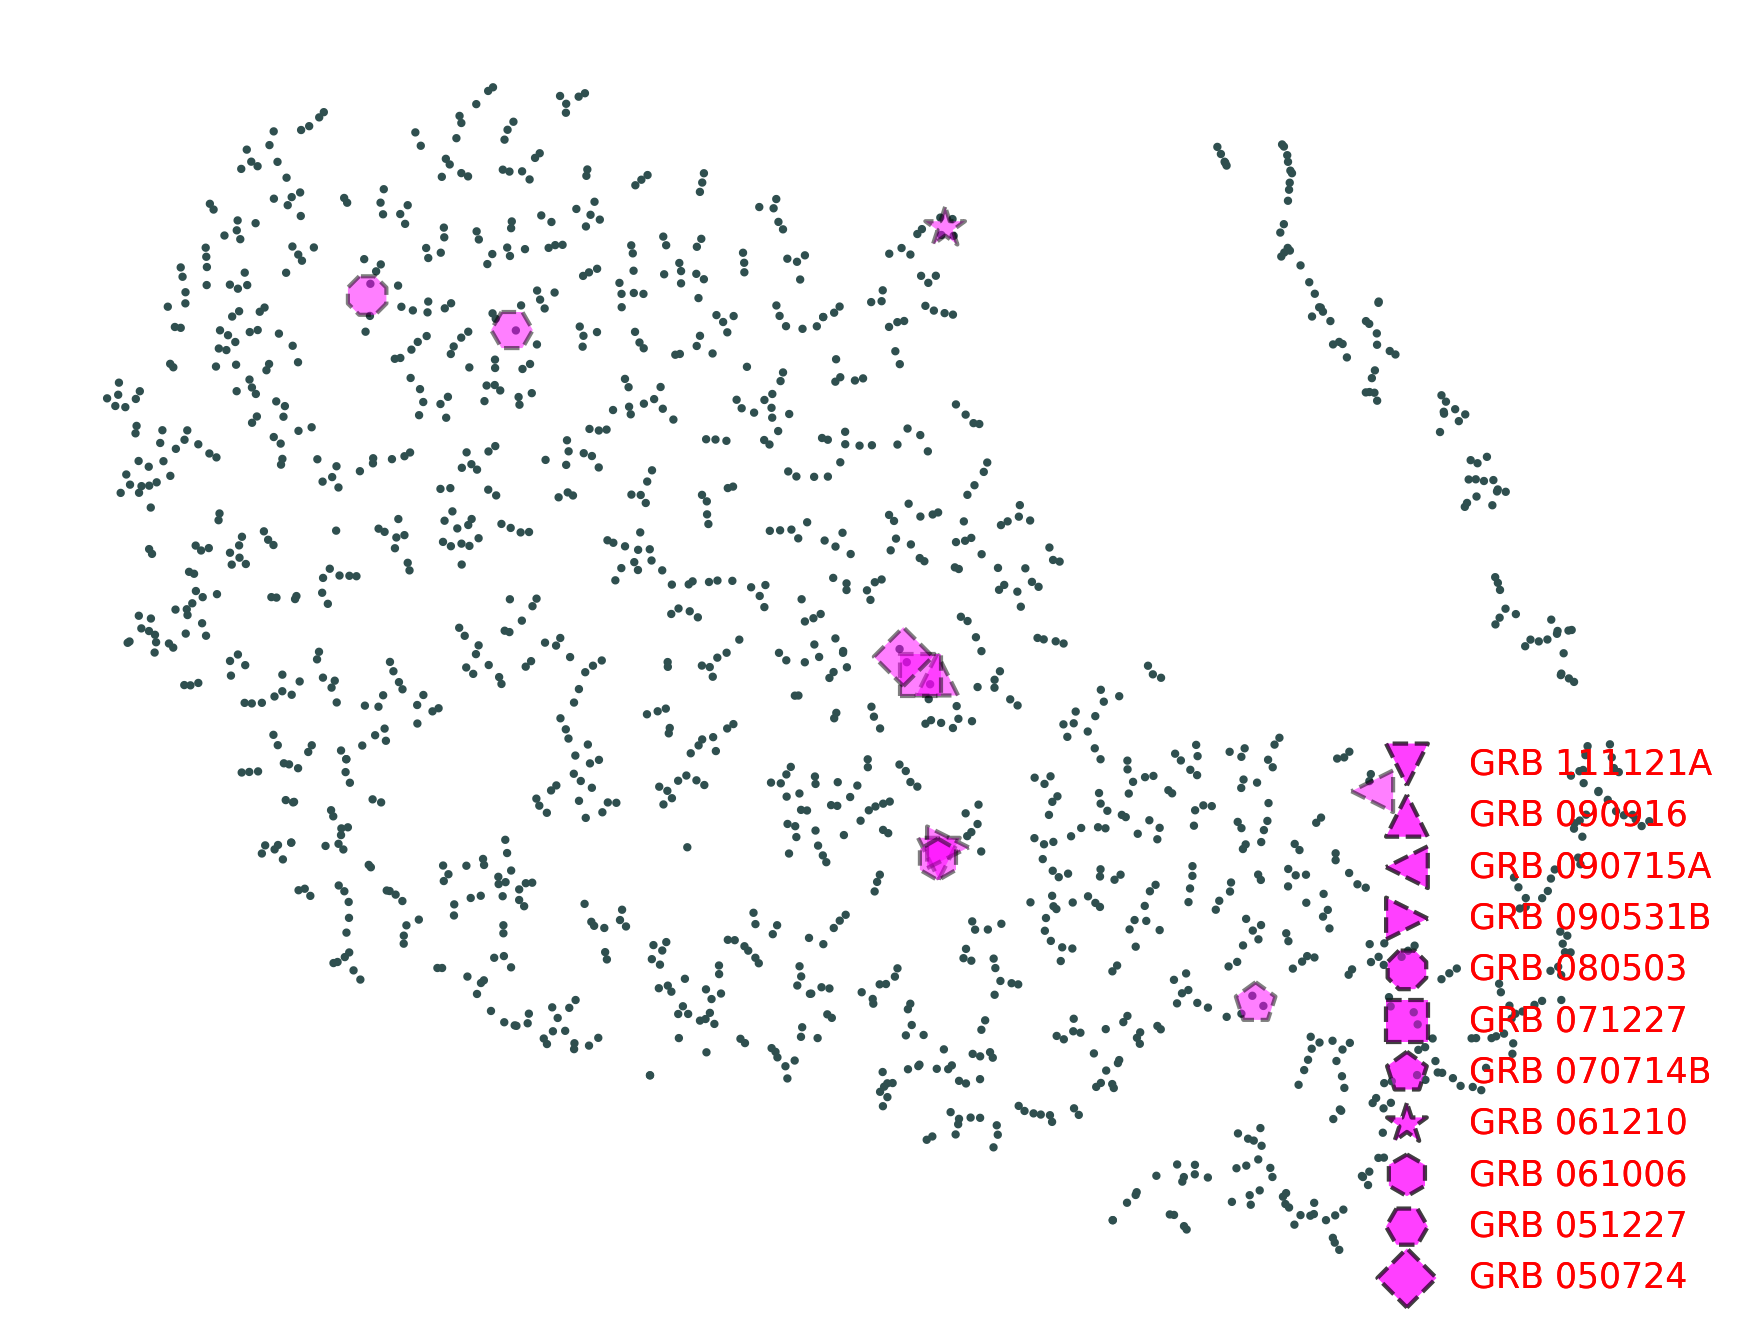

In [28]:
ax14 = swift.plot_tsne(scikit_embedding, names=grb_names, special_cases=EE_Lien16, special_marker_size=100, marker_size=1, special_marker_color='magenta', special_kwargs_plot={'alpha':0.5, 'facecolor':None, 'linestyle':'--'}, special_kwargs_legend={'loc':'best', 'bbox_to_anchor':(0.5, 0., 0.5, 0.5), 'labelcolor':'r'})

# Combine all options

Finally, it is possible to combine all the options seen above, in a more complex examples:

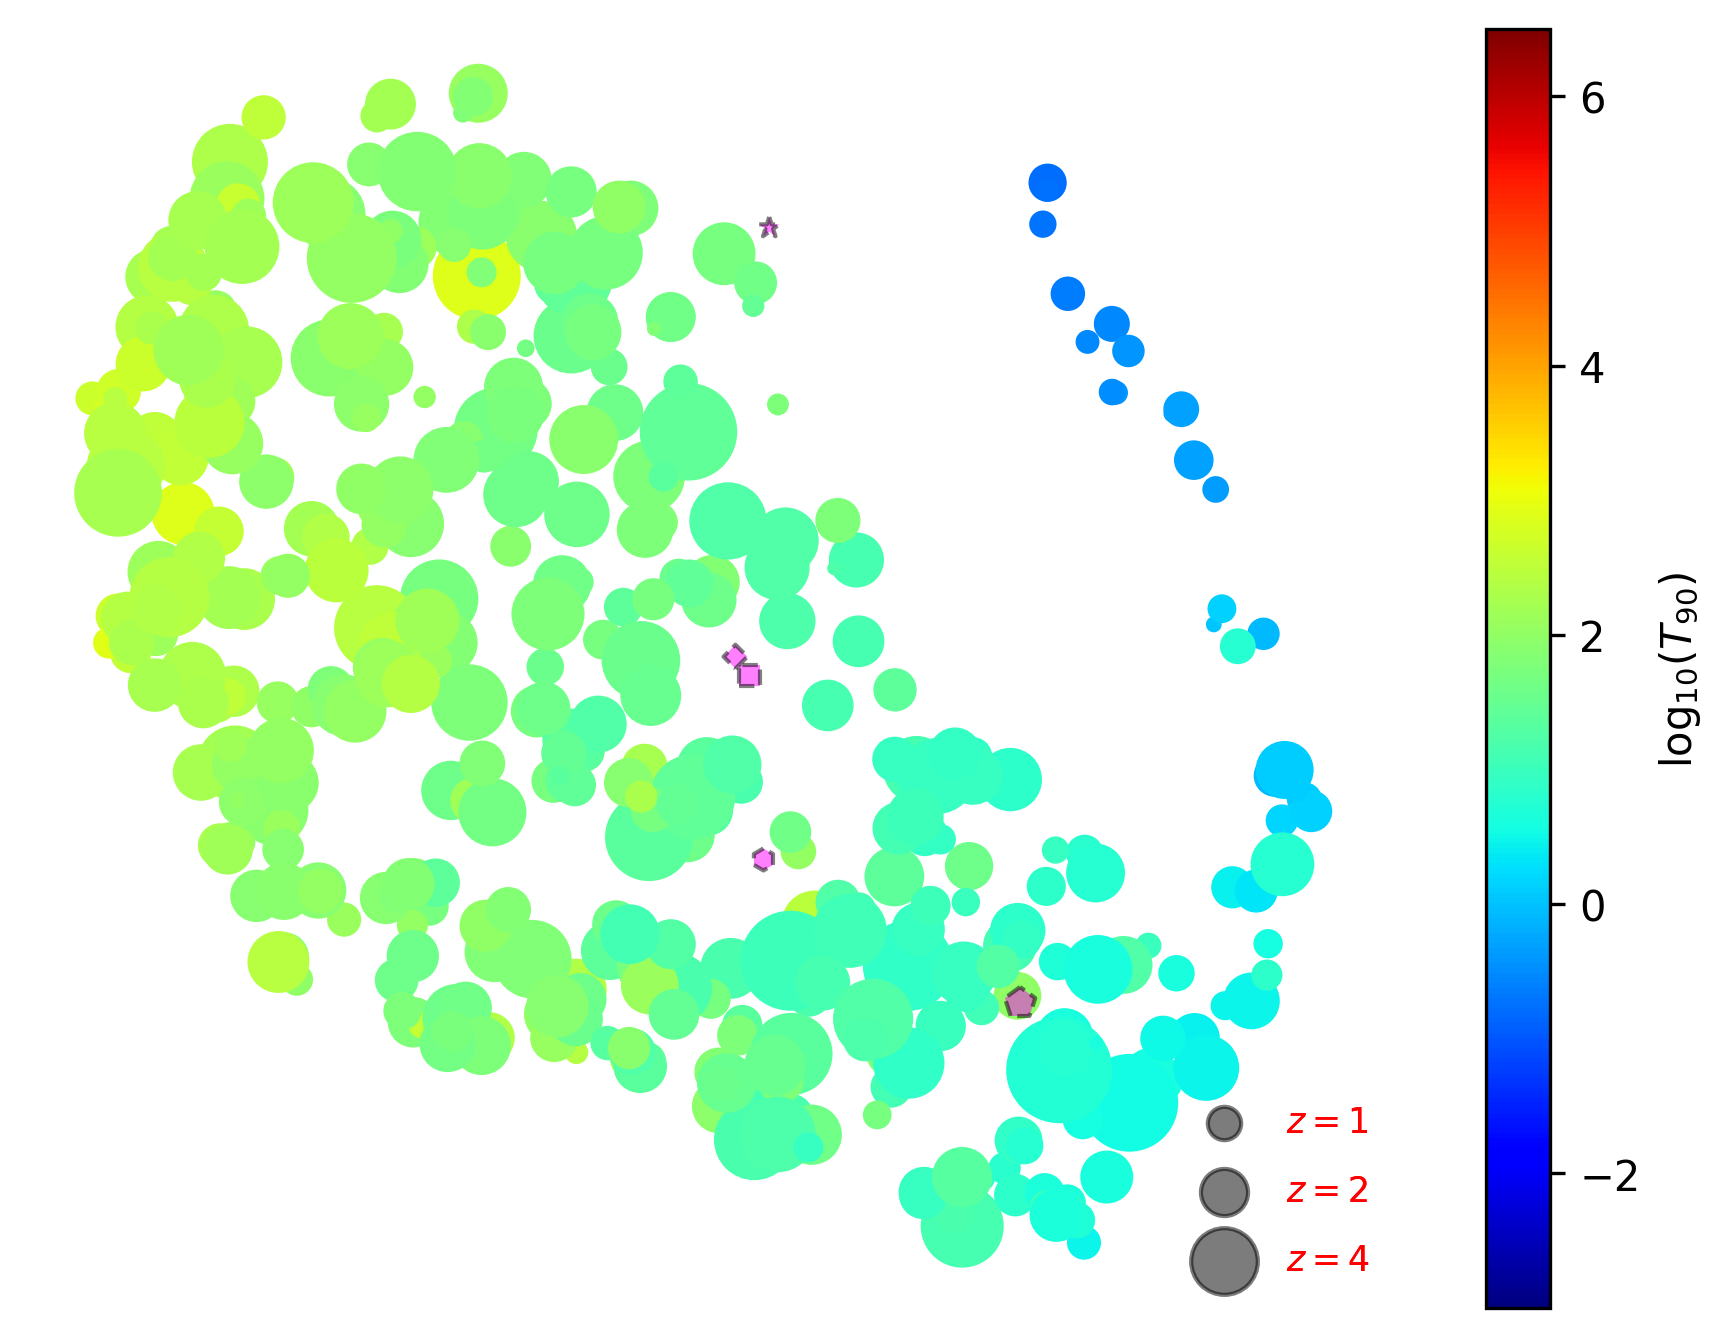

In [29]:
ax15 = swift.plot_tsne(scikit_embedding,
                       names=grb_names,
                       special_cases=EE_Lien16,
                       marker_size=1,
                       special_marker_color='magenta',
                       special_kwargs_plot={'alpha':0.5, 'facecolor':None, 'linestyle':'--'},
                       durations=durations,
                       redshifts=redshifts,
                       redshift_kwargs={'loc':'best', 'bbox_to_anchor':(0.5, 0., 0.5, 0.5), 'labelcolor':'r'},
                       color_limits=[-3, 6.5], legend_special_cases=False)

Axes(0.0843967,0.0806713;0.713733x0.888079)


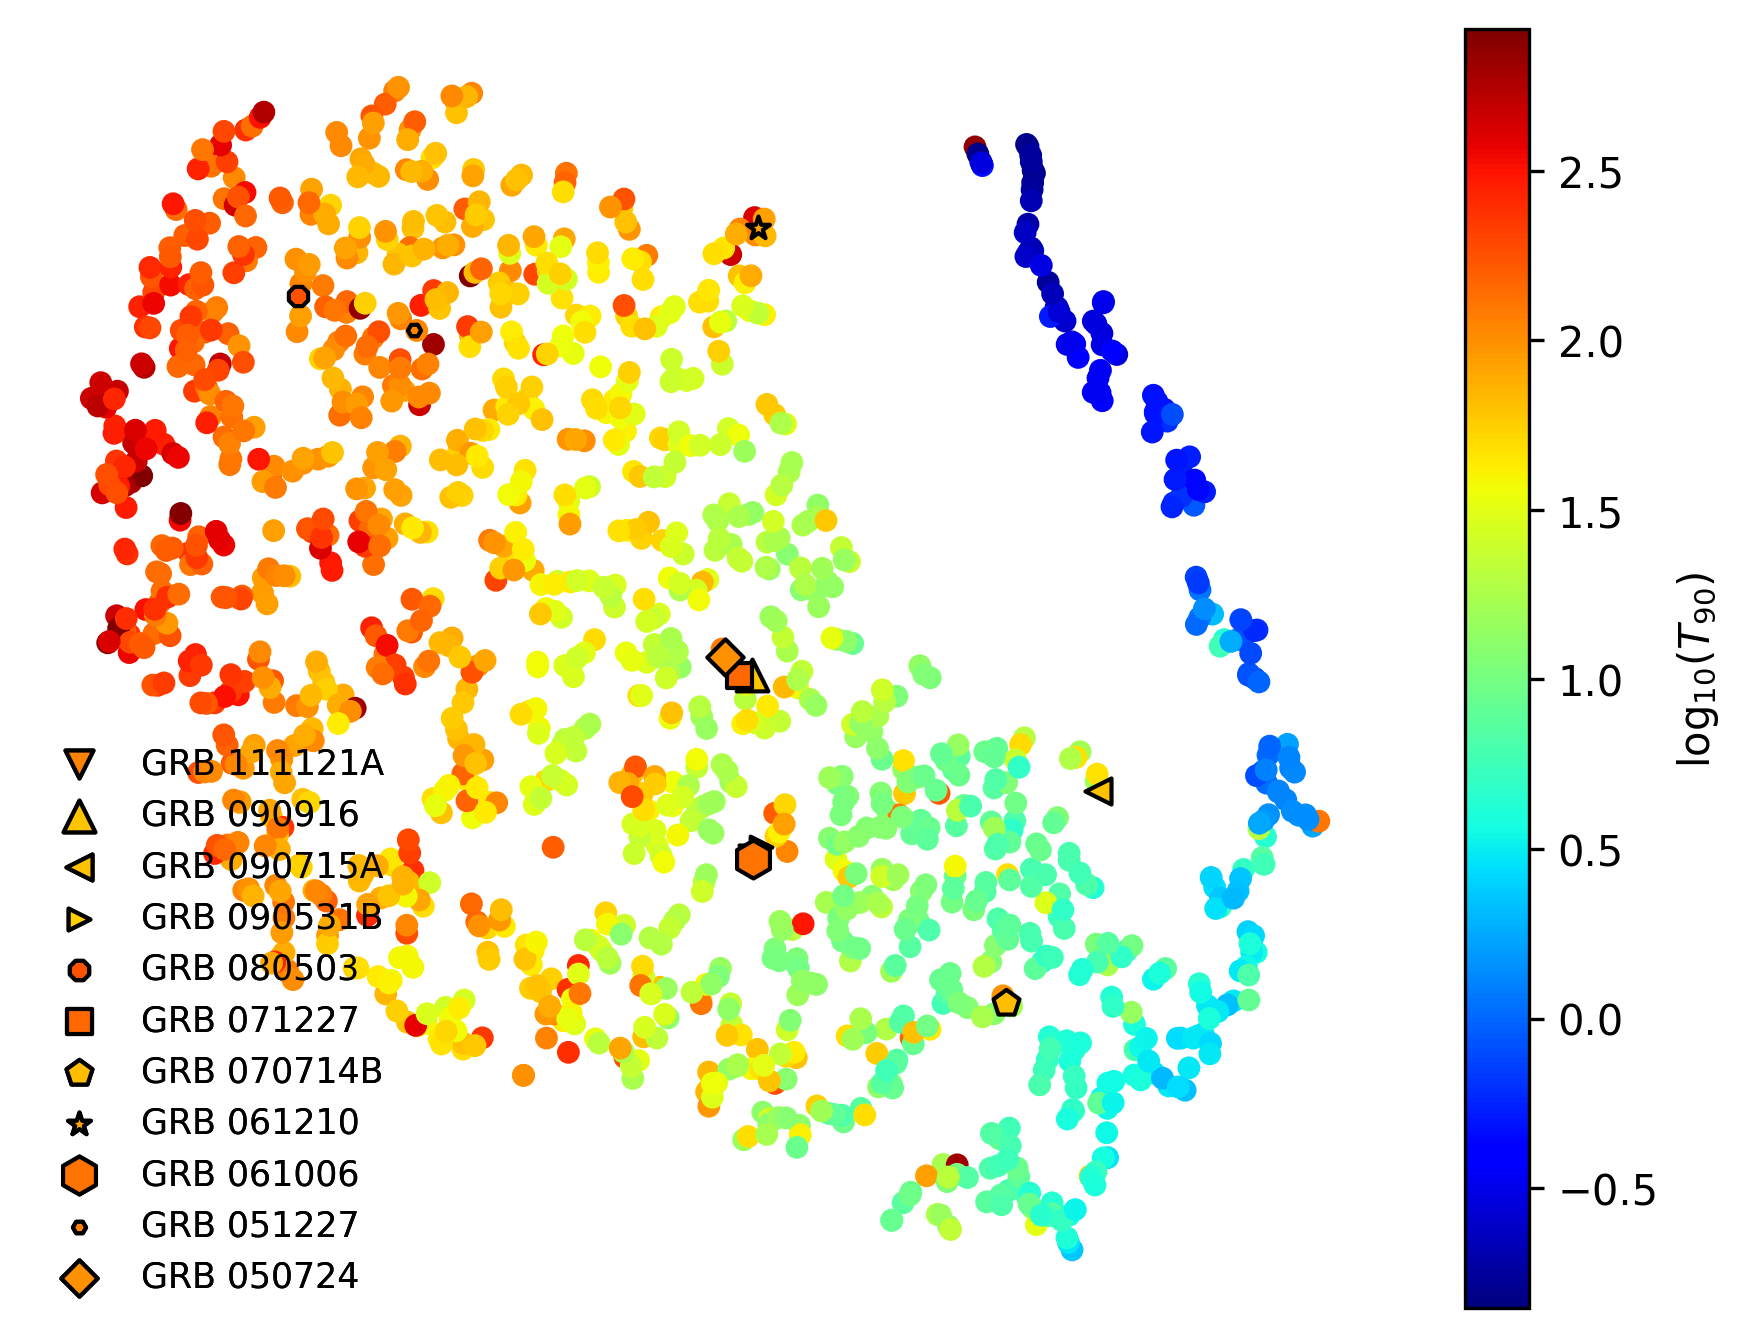

In [31]:
ax16 = swift.plot_tsne(scikit_embedding,
                       names=grb_names,
                       special_cases=EE_Lien16,
                       special_marker_size=np.random.randint(1, 100, size=len(EE_Lien16)),
                       marker_size=20,
                       durations=durations,
                       return_colorbar=True)
print(ax15)